In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import scipy
from scipy import stats

In [ ]:
#reading the train csv file
data = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")


#**Data Expolatory Analysis** 

In [ ]:
#visualing the Data
train_data = pd.DataFrame(data)
train_data.head(10)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
5,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,NaN,0.106476,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine_C/S
6,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,NaN,0.097834,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine_C/S
7,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,NaN,0.099494,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine_C/S
8,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,NaN,0.105145,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine_C/S
9,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,1.414329,...,NaN,0.093300,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,Control,Memantine_C/S


79 columns 

In [ ]:
train_data.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Genotype', 'Treatment_Behavior'],
      dtype='object')

From 79 columns two are object which are the classes, others are protein

In [ ]:
train_data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,582.000000,567.000000,762.000000,702.000000,762.000000,612.000000,582.000000,582.000000,762.000000
mean,0.437715,0.629456,0.319844,2.311905,3.882665,0.232722,0.182514,3.513055,0.212083,1.447201,...,0.226365,0.156693,0.136973,0.122095,0.129689,0.450260,0.166017,0.182322,0.206105,1.357954
std,0.275175,0.274954,0.046536,0.342923,0.929202,0.039521,0.026548,1.268395,0.031066,0.510631,...,0.029564,0.030299,0.029633,0.014928,0.022832,0.062304,0.059256,0.041938,0.058118,0.337107
min,0.170634,0.264085,0.194160,1.414914,1.794716,0.063236,0.064043,1.369898,0.112812,0.429032,...,0.162642,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.294759,0.481011,0.290199,2.069609,3.186726,0.206446,0.165306,2.424669,0.190616,1.213118,...,0.205750,0.136188,0.116234,0.110655,0.111676,0.407385,0.124382,0.152365,0.164155,1.075929
50%,0.371534,0.569058,0.317696,2.309711,3.800418,0.229032,0.181405,3.319506,0.210077,1.347557,...,0.224439,0.150386,0.131542,0.122600,0.126138,0.450500,0.153342,0.174184,0.191754,1.351277
75%,0.486749,0.700621,0.346747,2.534053,4.471656,0.255064,0.197664,4.493452,0.233947,1.542629,...,0.241714,0.170685,0.150942,0.133617,0.142831,0.488438,0.195401,0.205146,0.235925,1.616752
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.434624,0.317066,6.947290,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.210908,0.759588,0.479763,0.360692,0.413903,2.129791


In [ ]:
for column in train_data.columns.values:
    unique_value = pd.unique(train_data[column])
    print(column + " is of type " + str(train_data[column].dtypes) + " has " + str(len(unique_value)) + " unique values, and " + str(train_data[column].isnull().sum(axis=0)) + " null entries")
    if len(unique_value) < 5:
        unique_string = ""
        for n_value in range (0,len(unique_value)):
            unique_string = unique_string + str(unique_value[n_value]) + ','
        print("They are: " + unique_string[0:len(unique_string)-1])

DYRK1A_N is of type float64 has 762 unique values, and 0 null entries
ITSN1_N is of type float64 has 761 unique values, and 0 null entries
BDNF_N is of type float64 has 762 unique values, and 0 null entries
NR1_N is of type float64 has 762 unique values, and 0 null entries
NR2A_N is of type float64 has 762 unique values, and 0 null entries
pAKT_N is of type float64 has 762 unique values, and 0 null entries
pBRAF_N is of type float64 has 760 unique values, and 0 null entries
pCAMKII_N is of type float64 has 762 unique values, and 0 null entries
pCREB_N is of type float64 has 762 unique values, and 0 null entries
pELK_N is of type float64 has 762 unique values, and 0 null entries
pERK_N is of type float64 has 762 unique values, and 0 null entries
pJNK_N is of type float64 has 761 unique values, and 0 null entries
PKCA_N is of type float64 has 762 unique values, and 0 null entries
pMEK_N is of type float64 has 762 unique values, and 0 null entries
pNR1_N is of type float64 has 762 unique 

some columns have null entries

Ref: https://youtu.be/Ato-hcv0NK0


In [ ]:
#finding correlation between proteins
def correlation (Dataframe):
  Correlation = Dataframe.corr(method = 'spearman')
  fig, ax = plt.subplots(figsize=(len(Correlation),len(Correlation)))
  cax = ax.matshow(abs(Correlation),cmap='RdYlBu', vmin=0, vmax=1)
  fig.colorbar(cax)
  ticks = np.arange(0,len(Dataframe.columns),1)
  ax.set_xticks(ticks)
  plt.xticks(rotation=90)
  ax.set_yticks(ticks)
  plt.xticks()
  ax.set_xticklabels(Dataframe.columns)
  ax.set_yticklabels(Dataframe.columns)
  plt.xticks()
  plt.show()
  #ploting the heat map
  return Correlation

Ref: 
https://matplotlib.org/stable/tutorials/colors/colormaps.html


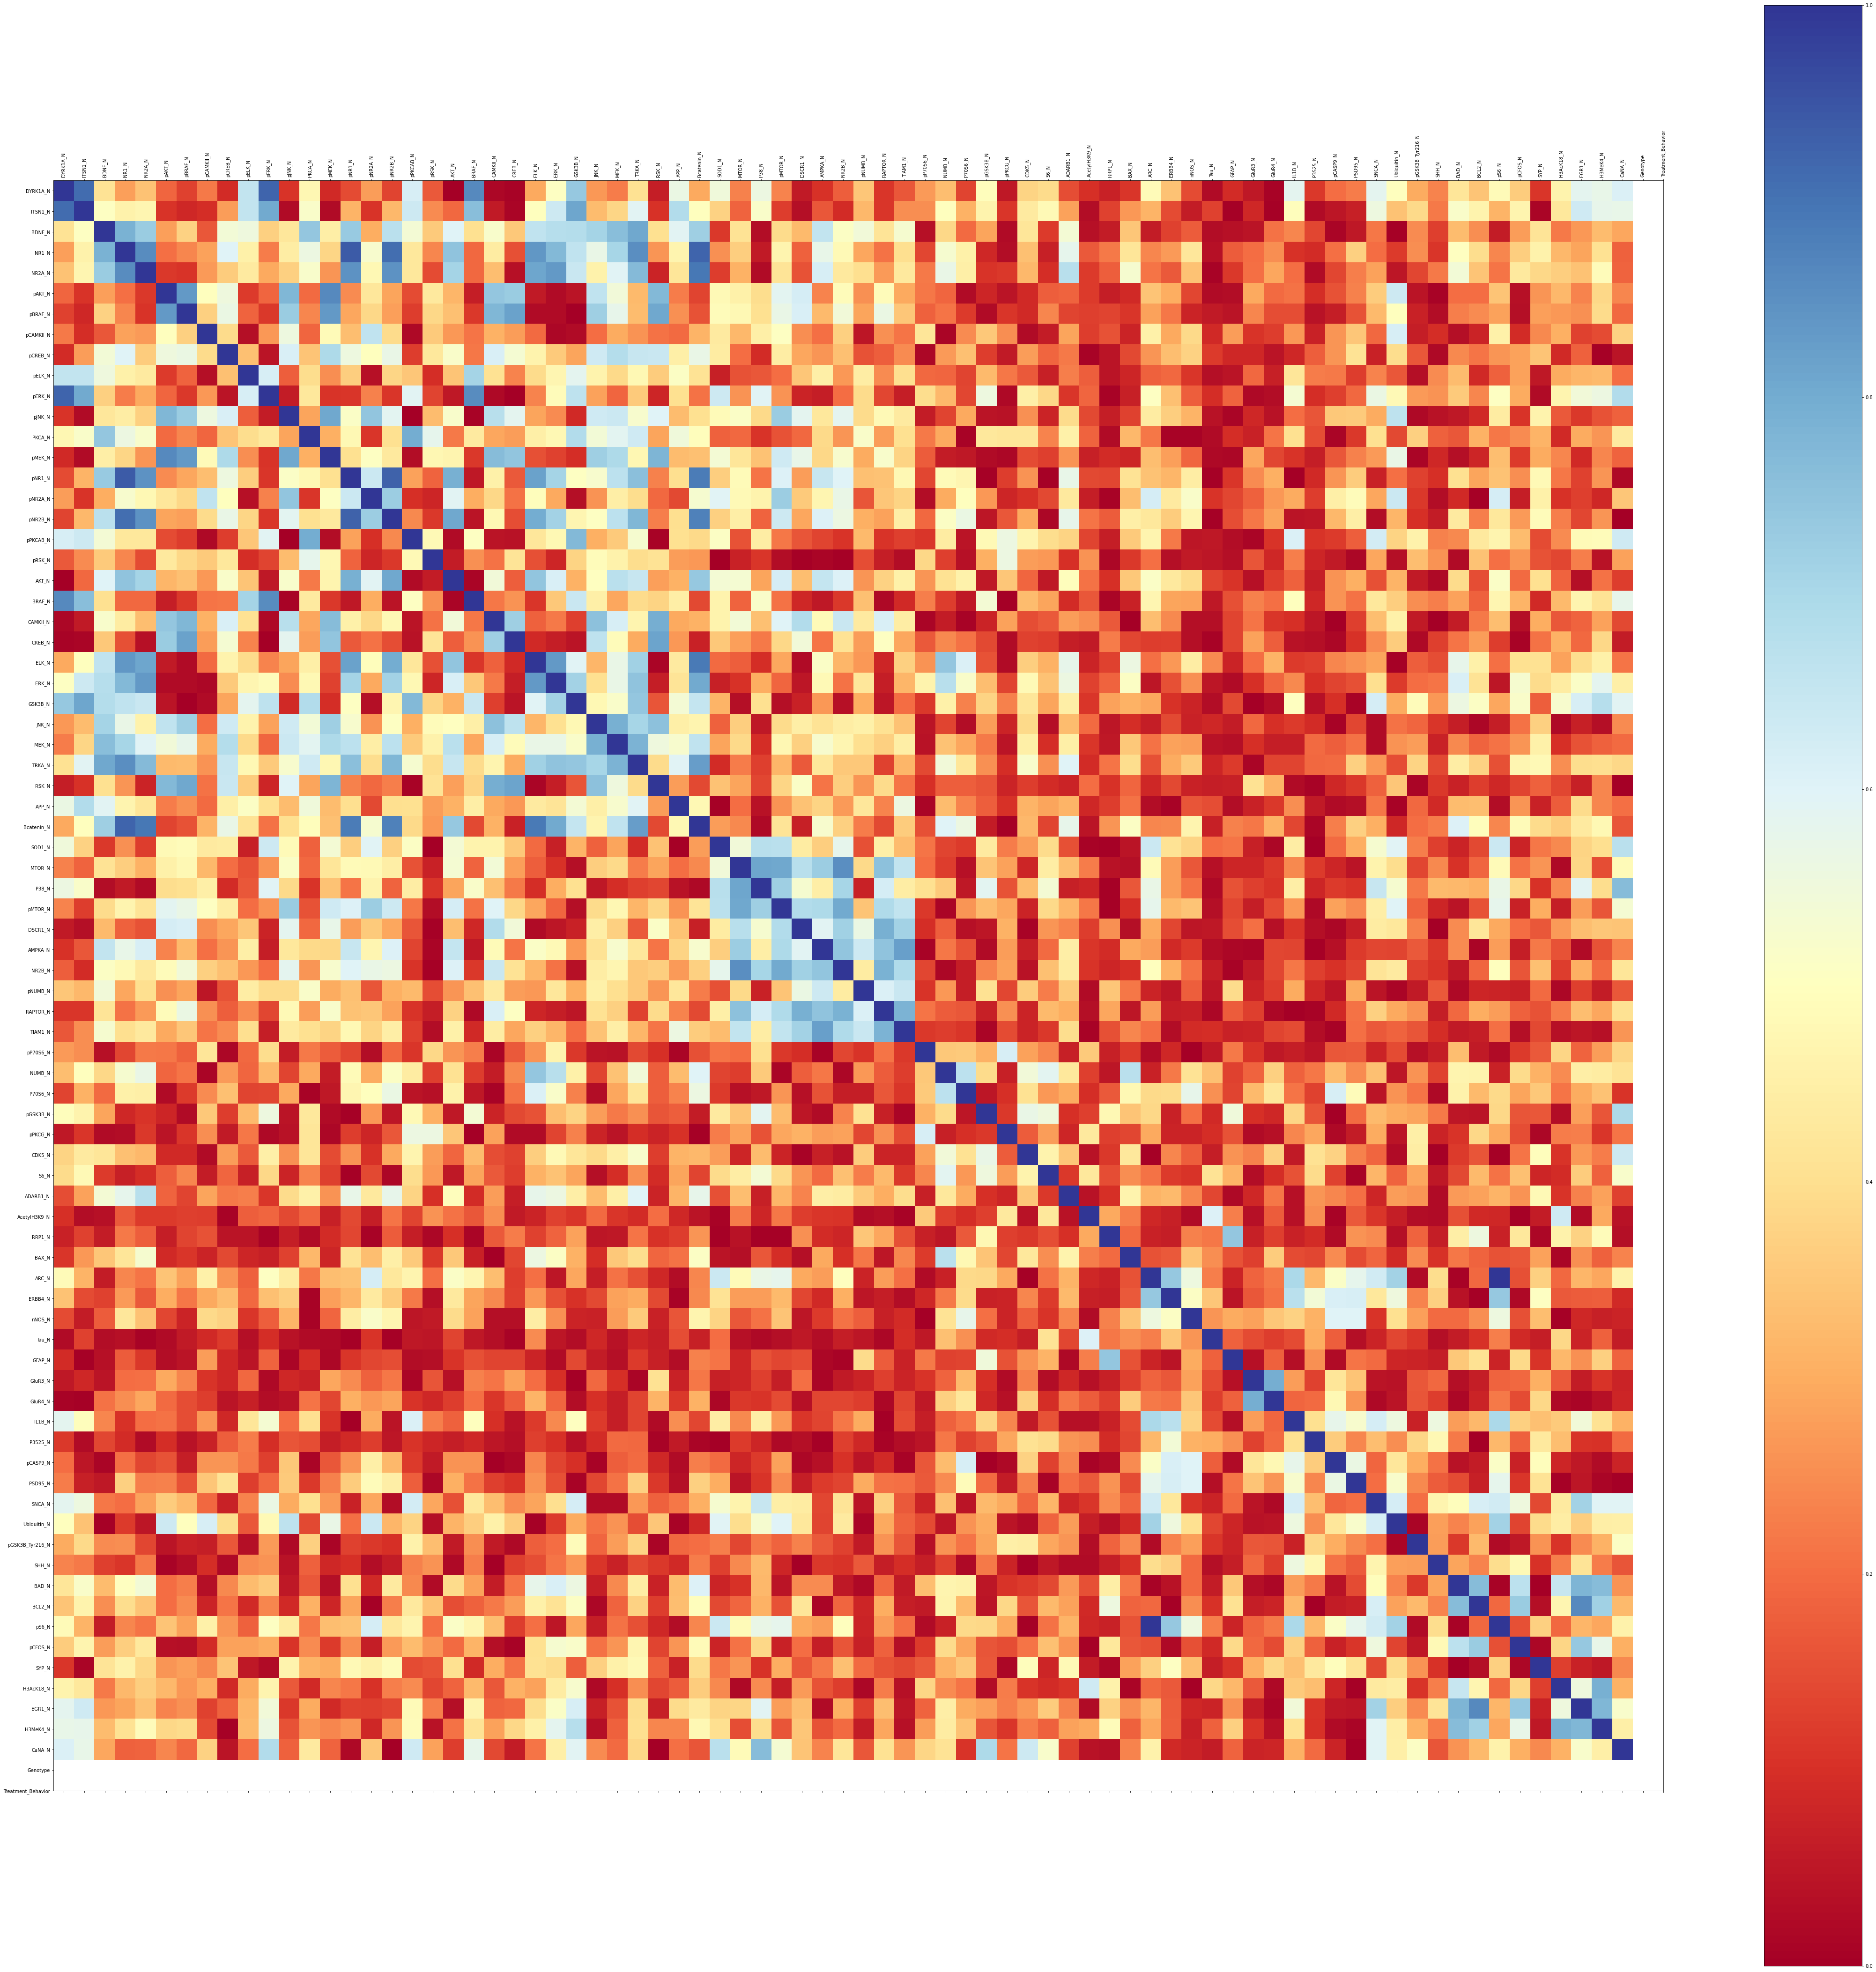

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.912085,0.411354,0.280789,0.342699,-0.190622,-0.130584,-0.222388,0.090353,0.655332,...,-0.236016,-0.418794,-0.346775,-0.484835,-0.361537,-0.113089,-0.463137,-0.582153,-0.573477,0.607034
ITSN1_N,0.912085,1.000000,0.504532,0.459726,0.471383,-0.109196,-0.085158,-0.096080,0.275713,0.654499,...,-0.219065,-0.517084,-0.463459,-0.316210,-0.467642,-0.014025,-0.427740,-0.630148,-0.577042,0.573372
BDNF_N,0.411354,0.504532,1.000000,0.785292,0.729232,0.279131,0.373132,0.166975,0.540866,0.553280,...,-0.125363,-0.329823,-0.250276,0.059235,-0.275702,0.417059,-0.219824,-0.267119,-0.328657,0.291728
NR1_N,0.280789,0.459726,0.785292,1.000000,0.858877,0.206448,0.240732,0.282662,0.599780,0.454918,...,-0.110350,-0.500310,-0.394744,0.240007,-0.364799,0.459032,-0.322171,-0.288022,-0.408002,0.180570
NR2A_N,0.342699,0.471383,0.729232,0.858877,1.000000,0.114383,0.108614,0.272124,0.359650,0.433781,...,-0.221175,-0.540063,-0.347520,0.211652,-0.432006,0.383346,-0.363385,-0.341819,-0.490627,0.183720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYP_N,-0.113089,-0.014025,0.417059,0.459032,0.383346,0.265142,0.279537,0.243249,0.347628,-0.053288,...,0.103504,0.003587,-0.031380,0.367611,-0.017595,1.000000,0.128513,0.073218,0.051727,0.242566
H3AcK18_N,-0.463137,-0.427740,-0.219824,-0.322171,-0.363385,0.324215,0.265642,0.306447,0.088182,-0.298415,...,0.227247,0.645005,0.471849,0.192566,0.380044,0.128513,1.000000,0.552515,0.791757,-0.308607
EGR1_N,-0.582153,-0.630148,-0.267119,-0.288022,-0.341819,0.237888,0.254742,0.131902,-0.180890,-0.319864,...,0.415685,0.779173,0.861947,0.317699,0.738250,0.073218,0.552515,1.000000,0.774557,-0.521769
H3MeK4_N,-0.573477,-0.577042,-0.328657,-0.408002,-0.490627,0.383596,0.394496,0.146895,-0.006438,-0.324987,...,0.225130,0.764831,0.717615,0.289851,0.573356,0.051727,0.791757,0.774557,1.000000,-0.450371


In [ ]:
Data_correlation = correlation(train_data)
Data_correlation

fRom coreelation heatmap, there is a lot correlation between lot of proteins

In [ ]:
def correlated_variables (Dataframe, threshold):
  correlation = Dataframe.corr(method = 'spearman')
  corr_var = {*()}
  for i in range(len(correlation.columns)):
    for j in range(i):
      if abs(correlation.iloc[i,j]) > threshold:
        corr_var.add(correlation.columns[j])
  return corr_var

Ref:
https://realpython.com/python-sets/
,
https://peps.python.org/pep-0448/


In [ ]:
#finding highly correlated variables
unusable_var = correlated_variables(train_data, 0.7)
print(unusable_var)
len(unusable_var)

{'pELK_N', 'ERBB4_N', 'RAPTOR_N', 'pERK_N', 'MTOR_N', 'AMPKA_N', 'pPKCAB_N', 'AKT_N', 'ELK_N', 'P38_N', 'pCFOS_N', 'NR2A_N', 'Ubiquitin_N', 'GSK3B_N', 'pBRAF_N', 'BAD_N', 'NR1_N', 'pNR1_N', 'TRKA_N', 'SNCA_N', 'DYRK1A_N', 'CREB_N', 'H3AcK18_N', 'pNR2B_N', 'PKCA_N', 'pMEK_N', 'pAKT_N', 'pJNK_N', 'RRP1_N', 'ARC_N', 'GluR3_N', 'pNR2A_N', 'MEK_N', 'BDNF_N', 'ERK_N', 'JNK_N', 'NR2B_N', 'EGR1_N', 'DSCR1_N', 'CAMKII_N', 'BCL2_N', 'ITSN1_N', 'pMTOR_N'}


43

43 proteins are correlated with themselves and other, they can eliminated

In [ ]:
#histogram of proteinto see the spread of the values
def histogram(Dataframe):
  for col in Dataframe.columns.values:
    if (Dataframe[col].dtypes == 'float64'):
      plt.hist(Dataframe[col])
      plt.xlabel(col)
      plt.show()
      print("mean = " + str(np.mean(Dataframe[col])))
      print("Varience = " + str(np.var(Dataframe[col])))
      print("Skewness = " + str(stats.skew(Dataframe[col])))
      print("Kurtosis = " + str(stats.kurtosis(Dataframe[col])))
      print('\n')

Ref:
https://stackoverflow.com/questions/45483890/how-to-correctly-use-scipys-skew-and-kurtosis-functions

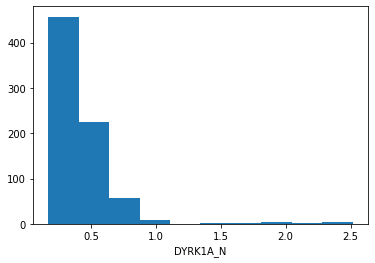

mean = 0.43771534769685055
Varience = 0.07562209966240892
Skewness = 4.39845574599655
Kurtosis = 24.869828871866993




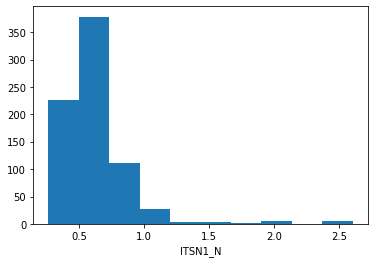

mean = 0.6294556964422567
Varience = 0.07550074859083432
Skewness = 3.7595392442825415
Kurtosis = 20.328535428318606




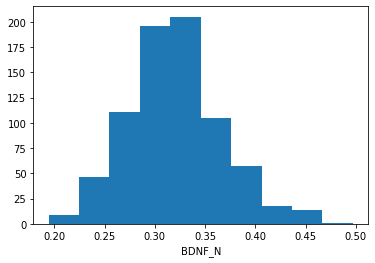

mean = 0.31984410104461947
Varience = 0.002162726918441396
Skewness = 0.4024174892634114
Kurtosis = 0.463774535919832




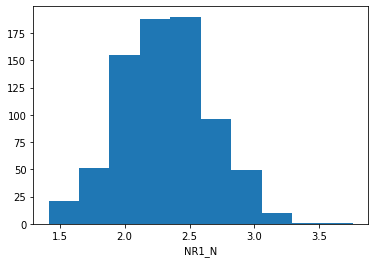

mean = 2.31190463381365
Varience = 0.11744173511970273
Skewness = 0.15434595957911115
Kurtosis = 0.08262616102214393




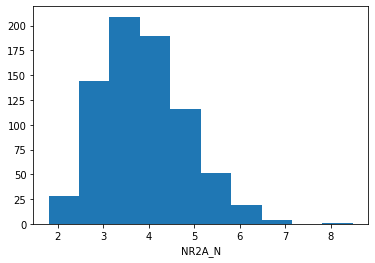

mean = 3.8826646957795274
Varience = 0.8622827287201498
Skewness = 0.5742751932376824
Kurtosis = 0.6118643885533643




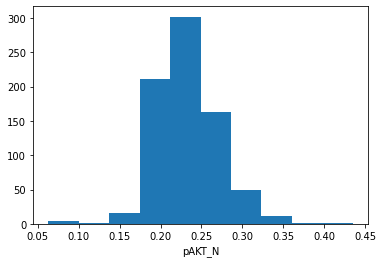

mean = 0.232721945577428
Varience = 0.0015598973175452906
Skewness = 0.4128260295521822
Kurtosis = 2.1181477034026868




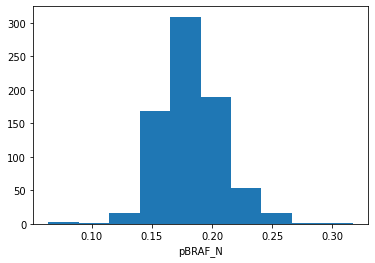

mean = 0.18251416383595803
Varience = 0.0007038635025554393
Skewness = 0.2905326723004036
Kurtosis = 2.7034132137315785




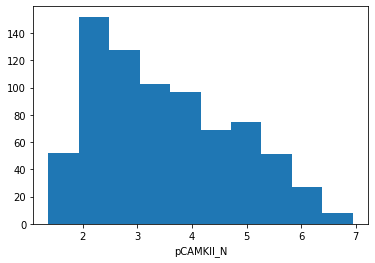

mean = 3.5130545965301834
Varience = 1.6067136654415266
Skewness = 0.5069678870784398
Kurtosis = -0.7552928726034978




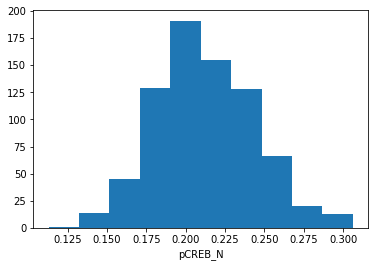

mean = 0.2120829129396325
Varience = 0.0009638463959882297
Skewness = 0.24056441109073887
Kurtosis = 0.06480496868794461




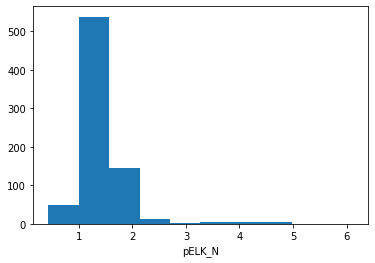

mean = 1.447200722276901
Varience = 0.2604020568915467
Skewness = 4.156891297087511
Kurtosis = 24.205816418048535




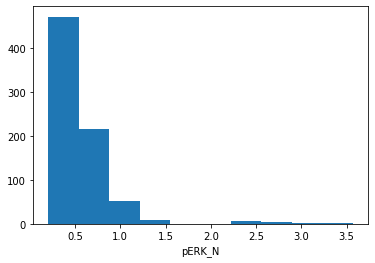

mean = 0.5634080290065613
Varience = 0.13995840026048567
Skewness = 4.023409414237635
Kurtosis = 21.861940192283747




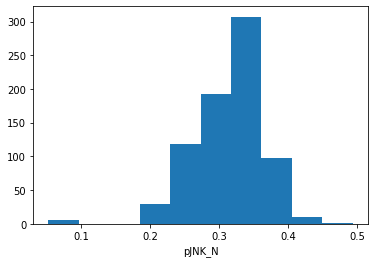

mean = 0.31398434539894987
Varience = 0.002611509352976929
Skewness = -0.898031638668916
Kurtosis = 3.25566358264566




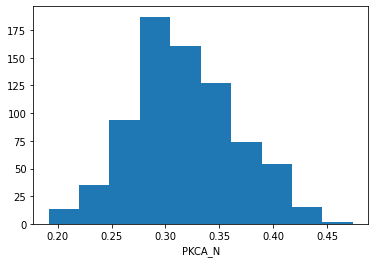

mean = 0.3179113720459315
Varience = 0.002362512371574189
Skewness = 0.23554918744525022
Kurtosis = -0.17393516989747848




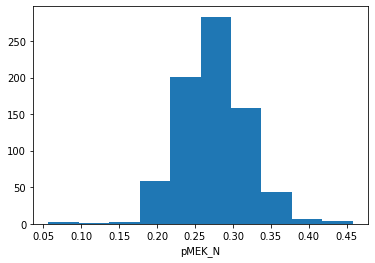

mean = 0.2750155939698161
Varience = 0.0019291286868384468
Skewness = 0.04101604217015429
Kurtosis = 1.8148652881838645




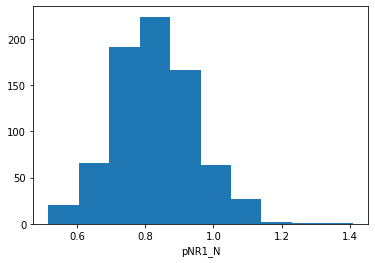

mean = 0.8301626865144353
Varience = 0.013849366426624531
Skewness = 0.37217621146820884
Kurtosis = 0.7049604799824074




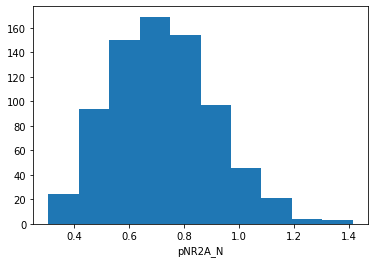

mean = 0.7241541655170602
Varience = 0.03447813287585542
Skewness = 0.41833998968743735
Kurtosis = 0.09279530034182004




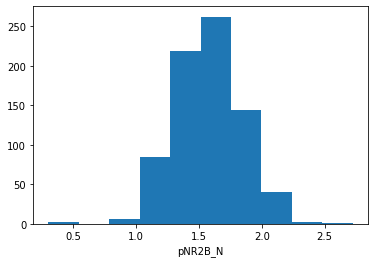

mean = 1.5763952641929115
Varience = 0.07349964803446017
Skewness = -0.19025967135107438
Kurtosis = 1.4141924549531764




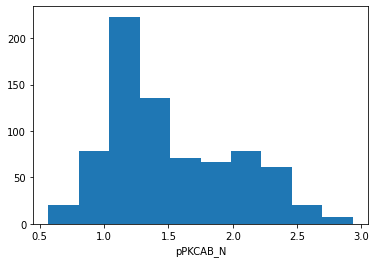

mean = 1.5170219683517052
Varience = 0.23397962385756277
Skewness = 0.622540294808502
Kurtosis = -0.5446555398875192




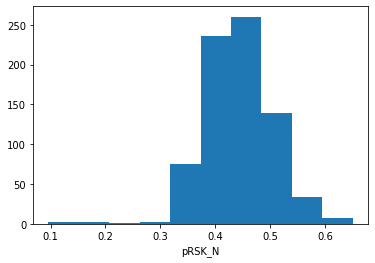

mean = 0.4422470540052491
Varience = 0.004135057171321592
Skewness = -0.5836957098372296
Kurtosis = 3.778957706124597




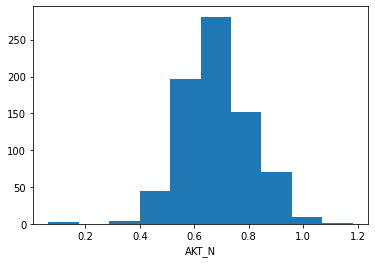

mean = 0.6819855086850393
Varience = 0.015954371284471705
Skewness = -0.145437391947538
Kurtosis = 1.9556732609586565




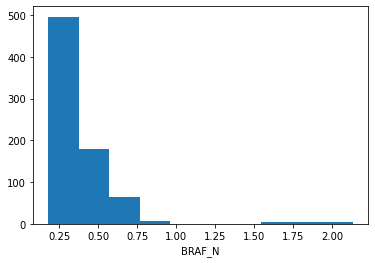

mean = 0.3906116177099737
Varience = 0.05809616886943177
Skewness = 4.460733952925165
Kurtosis = 24.463977035530213




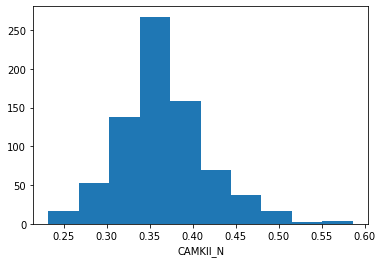

mean = 0.3666758751837273
Varience = 0.002674511622326403
Skewness = 0.6434630011535187
Kurtosis = 1.1917352784156234




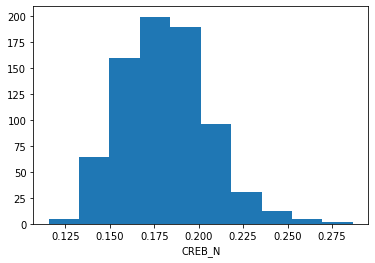

mean = 0.18141264093307097
Varience = 0.000608938981577824
Skewness = 0.5454843050160848
Kurtosis = 0.660089803645671




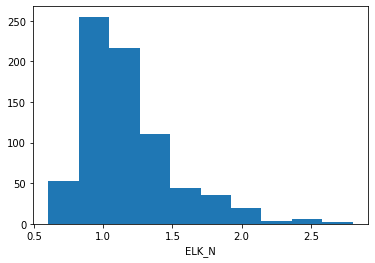

mean = 1.182847325009372
Varience = 0.11365534225063509
Skewness = nan
Kurtosis = nan




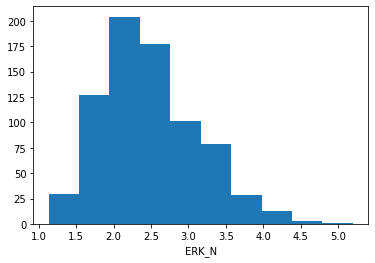

mean = 2.4843940500879285
Varience = 0.41423059020728525
Skewness = 0.6617834004322832
Kurtosis = 0.29799096095188293




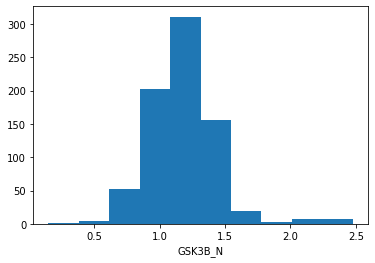

mean = 1.1797026225957998
Varience = 0.06791886744826948
Skewness = 1.143104026779889
Kurtosis = 4.48478018363751




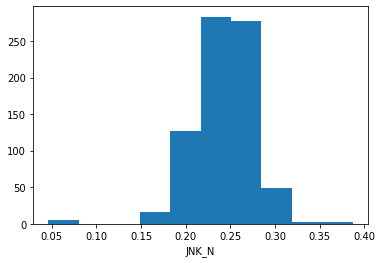

mean = 0.24306379711548615
Varience = 0.0011340158844193537
Skewness = -1.1585545365551546
Kurtosis = 6.123567700397155




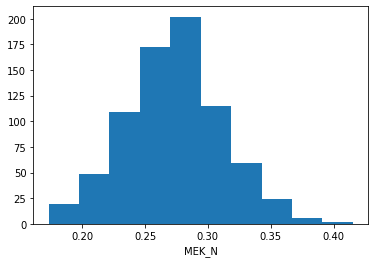

mean = 0.2735010344195248
Varience = 0.0014941704287369888
Skewness = nan
Kurtosis = nan




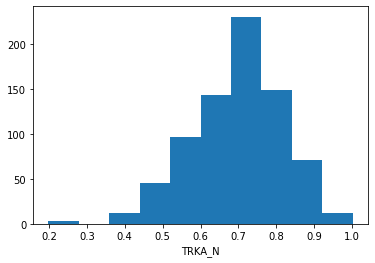

mean = 0.6971105996246724
Varience = 0.014347966842900807
Skewness = -0.46212934462668903
Kurtosis = 0.542577681636383




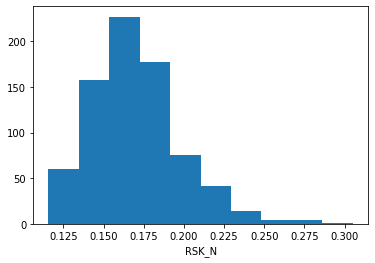

mean = 0.16974716217585303
Varience = 0.0007804778950269949
Skewness = 0.8687681792320807
Kurtosis = 1.4181599098940758




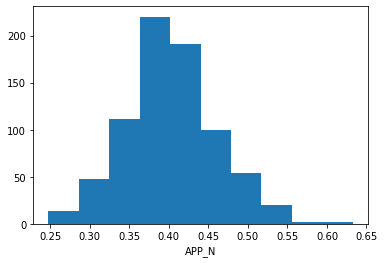

mean = 0.4020361939120736
Varience = 0.0032782909148409587
Skewness = 0.2843892419704259
Kurtosis = 0.4088725344934274




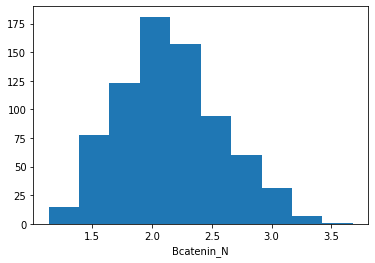

mean = 2.1492088925796513
Varience = 0.18253947860256084
Skewness = nan
Kurtosis = nan




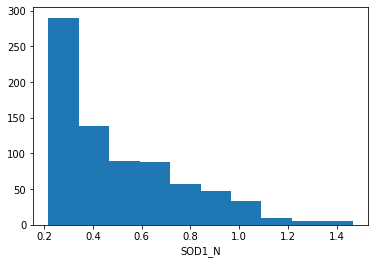

mean = 0.5116936231141729
Varience = 0.062466007278519566
Skewness = 1.1541574128985346
Kurtosis = 0.6777205455391884




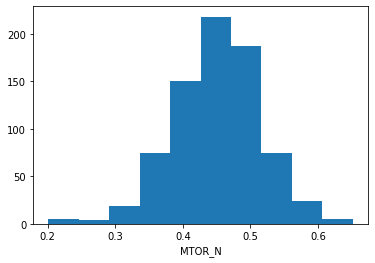

mean = 0.44982212718897646
Varience = 0.004099375262947945
Skewness = -0.2906703094723797
Kurtosis = 0.7360710831184987




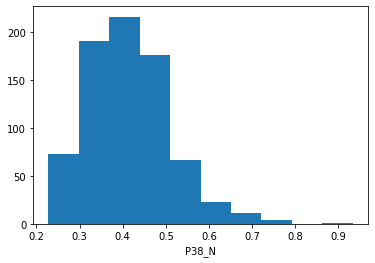

mean = 0.414002930501312
Varience = 0.008790582033191116
Skewness = 0.8487273200452473
Kurtosis = 1.5993948405564087




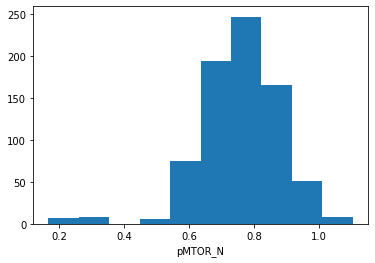

mean = 0.758143041355643
Varience = 0.015879677495362194
Skewness = -0.9699248199305378
Kurtosis = 3.458821395634577




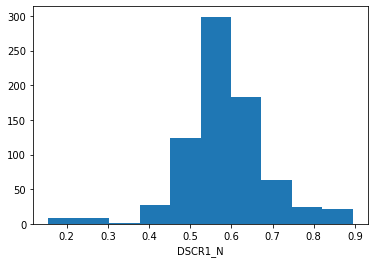

mean = 0.5826312804566924
Varience = 0.01070921689412914
Skewness = -0.24464627766931063
Kurtosis = 2.786756624563531




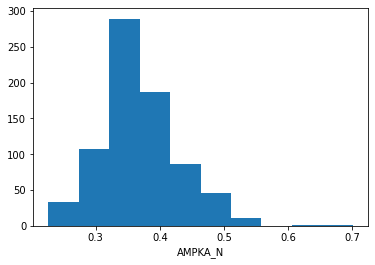

mean = 0.36869517263385815
Varience = 0.003589963771574549
Skewness = 0.7381999855905061
Kurtosis = 1.5032229121308553




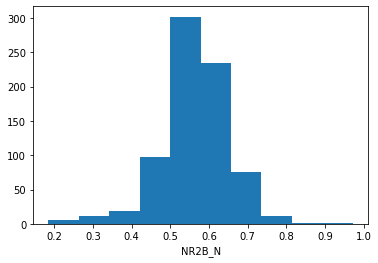

mean = 0.5654925237808387
Varience = 0.008075328312668406
Skewness = -0.40991638215213444
Kurtosis = 3.0345455171521314




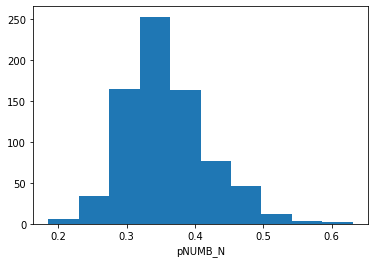

mean = 0.3580454025787407
Varience = 0.0037832470569412286
Skewness = 0.7342138827380752
Kurtosis = 0.9667827261541699




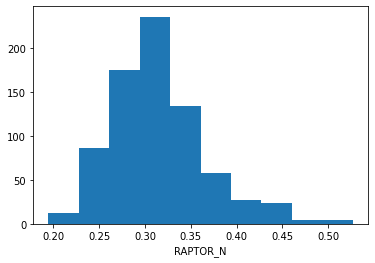

mean = 0.3147231673740163
Varience = 0.002627469526480236
Skewness = 0.8620407096638799
Kurtosis = 1.0899074721648905




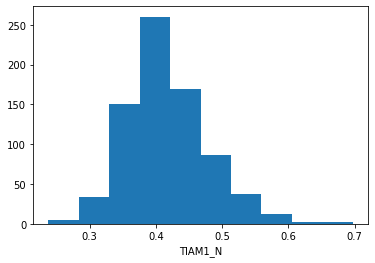

mean = 0.41657944293307103
Varience = 0.003815908853039192
Skewness = 0.7125001647596126
Kurtosis = 0.9874323366021978




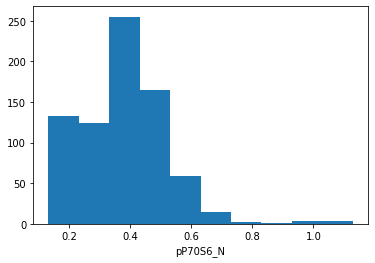

mean = 0.37883316860892347
Varience = 0.020788251002855068
Skewness = 1.055934096474711
Kurtosis = 3.3143565463281233




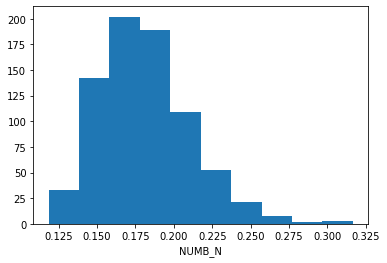

mean = 0.18178931042257207
Varience = 0.0008826966831794054
Skewness = 0.8181799600876857
Kurtosis = 1.137335292294198




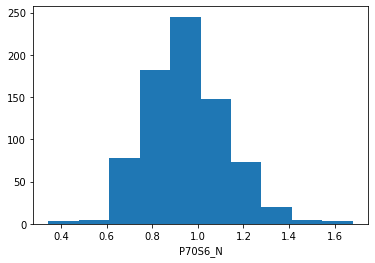

mean = 0.9494765087729655
Varience = 0.02911353751560388
Skewness = 0.3805140999644086
Kurtosis = 0.8001725336994805




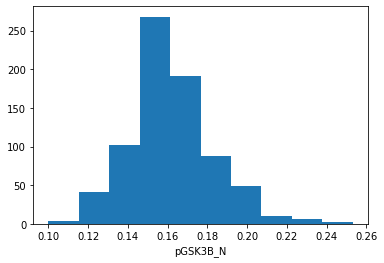

mean = 0.16169153555511806
Varience = 0.0004349577848878594
Skewness = 0.6143448481587973
Kurtosis = 1.162605066528661




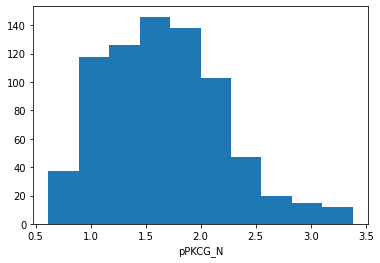

mean = 1.6659689254829393
Varience = 0.29590220901540903
Skewness = 0.4847558184283176
Kurtosis = -0.018847548363568833




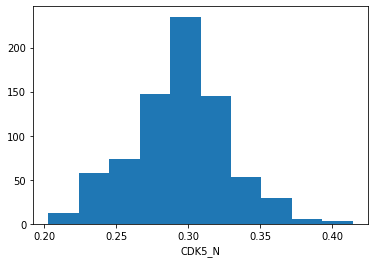

mean = 0.2940627164251969
Varience = 0.001095983714516476
Skewness = 0.038535387952240714
Kurtosis = 0.3466465795567468




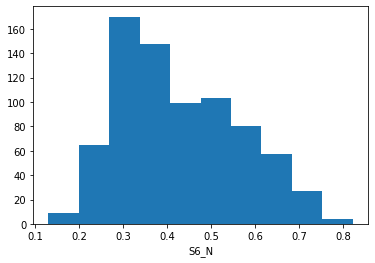

mean = 0.4267876166286093
Varience = 0.018457258528820464
Skewness = 0.43879819059024244
Kurtosis = -0.6591305878610356




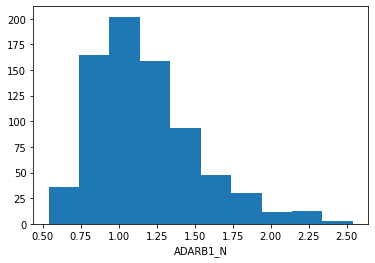

mean = 1.1779770728727041
Varience = 0.11623877075088722
Skewness = 1.053820063412638
Kurtosis = 1.1796588257533802




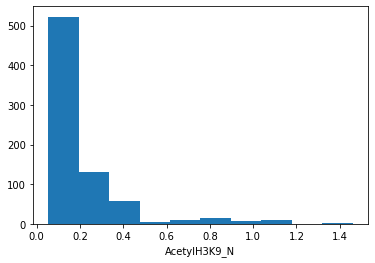

mean = 0.21173864993831992
Varience = 0.04014699318216311
Skewness = 2.8514394706756674
Kurtosis = 9.143714717865123




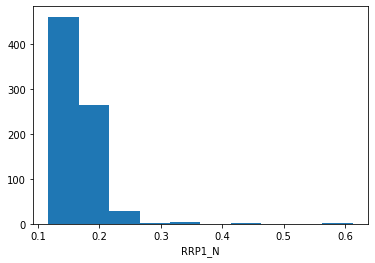

mean = 0.16678140270603678
Varience = 0.0011092223886594085
Skewness = 4.829273446625566
Kurtosis = 48.977657120194074




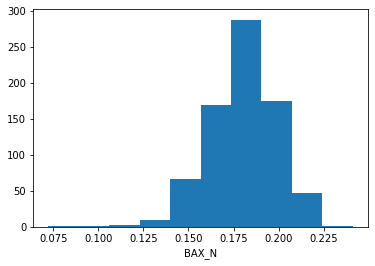

mean = 0.18001224507217867
Varience = 0.0003561066214970122
Skewness = -0.6009085365499374
Kurtosis = 1.6606152238115959




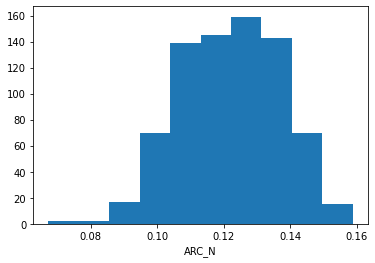

mean = 0.12209476892125988
Varience = 0.00022254271970086062
Skewness = -0.14540532911899468
Kurtosis = -0.44629547158163385




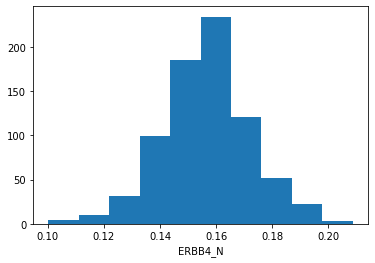

mean = 0.15655416818241472
Varience = 0.0002502468611010362
Skewness = -0.02871039040580829
Kurtosis = 0.43804775419469344




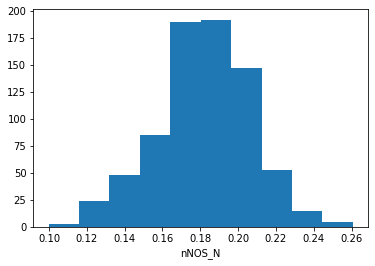

mean = 0.18200126499868763
Varience = 0.0006376890494404587
Skewness = -0.16764625350720758
Kurtosis = 0.2292210395830816




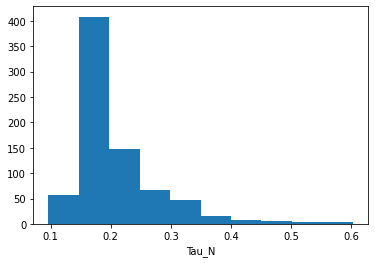

mean = 0.20887291873359592
Varience = 0.004920101224769232
Skewness = 2.112548379748132
Kurtosis = 5.820752793566992




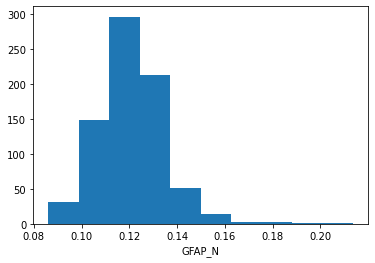

mean = 0.12101759018635165
Varience = 0.00019493541257723337
Skewness = 0.9448451333135445
Kurtosis = 4.078234481872151




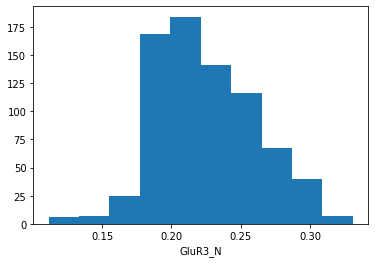

mean = 0.22448474016272996
Varience = 0.0013151470949056175
Skewness = 0.28156320499775417
Kurtosis = -0.16723825994634334




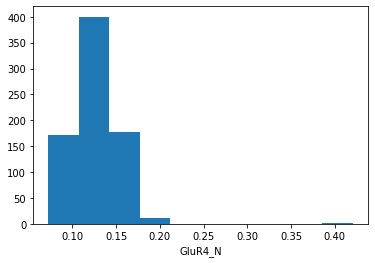

mean = 0.1267393778530184
Varience = 0.0006085430413509168
Skewness = 2.40931679825857
Kurtosis = 25.122835519129712




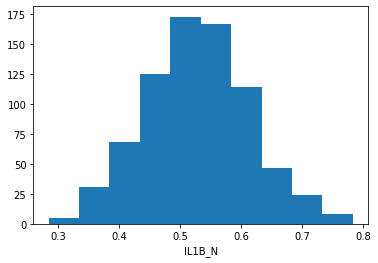

mean = 0.5290045696115478
Varience = 0.0073122729325534605
Skewness = 0.11502737711265575
Kurtosis = -0.03203154499274019




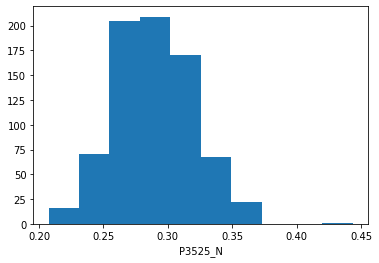

mean = 0.2892363658267717
Varience = 0.0009129359776267593
Skewness = 0.23692466419607677
Kurtosis = 0.395248184030621




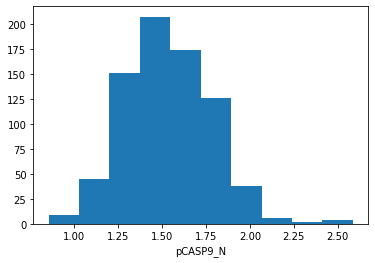

mean = 1.5334108382401574
Varience = 0.06145933118855916
Skewness = 0.3858567229014307
Kurtosis = 0.8067071249231708




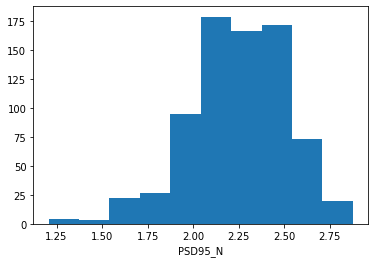

mean = 2.2495254082112845
Varience = 0.06995438323175984
Skewness = -0.4989596723877525
Kurtosis = 0.6100172852399215




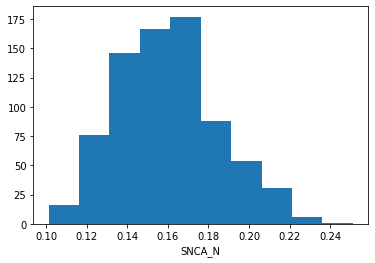

mean = 0.16020596272178486
Varience = 0.0006201230717991085
Skewness = 0.400010651019348
Kurtosis = -0.0390519668918099




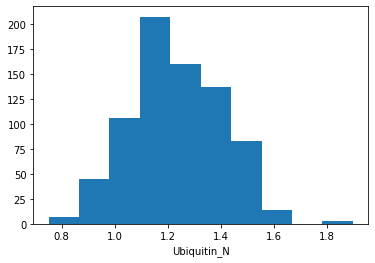

mean = 1.234310506891077
Varience = 0.02987240214905133
Skewness = 0.1462416365352247
Kurtosis = -0.08905075063906898




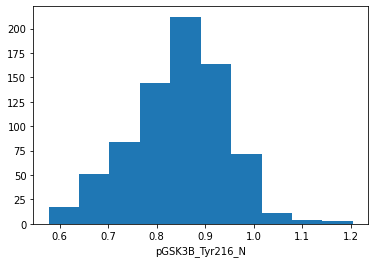

mean = 0.8467781004527563
Varience = 0.00925902517452676
Skewness = -0.16777200503350576
Kurtosis = 0.19293800851667653




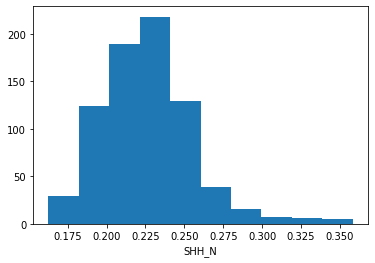

mean = 0.22636468512860922
Varience = 0.0008728940592927873
Skewness = 1.0058570809200431
Kurtosis = 2.2140471609182697




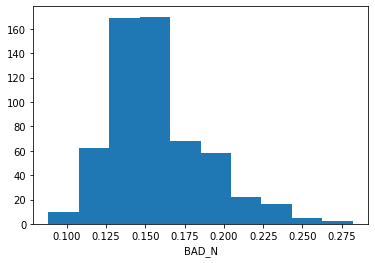

mean = 0.15669266490378003
Varience = 0.0009164551886130971
Skewness = nan
Kurtosis = nan




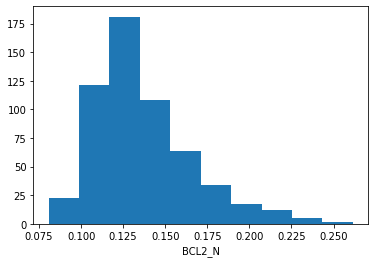

mean = 0.13697268308112862
Varience = 0.0008765638784524226
Skewness = nan
Kurtosis = nan




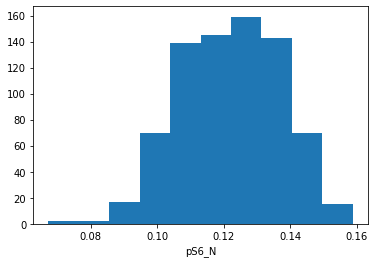

mean = 0.12209476892125988
Varience = 0.00022254271970086062
Skewness = -0.14540532911899468
Kurtosis = -0.44629547158163385




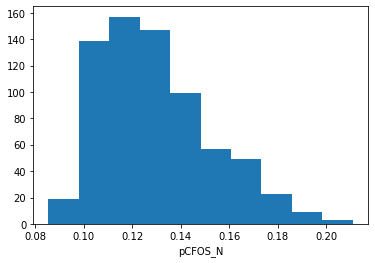

mean = 0.12968946876638188
Varience = 0.0005205389138298873
Skewness = nan
Kurtosis = nan




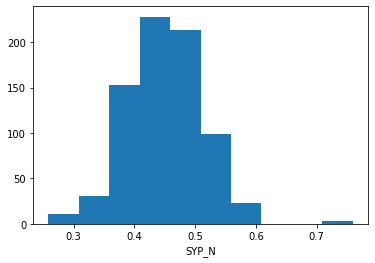

mean = 0.4502599629330713
Varience = 0.0038766591897024015
Skewness = 0.2920219164155741
Kurtosis = 1.4069803323935632




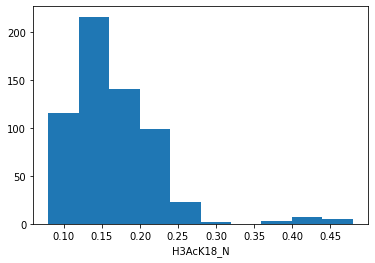

mean = 0.16601742463725494
Varience = 0.0035055056060026043
Skewness = nan
Kurtosis = nan




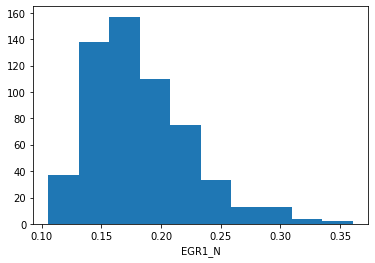

mean = 0.18232203920790394
Varience = 0.0017557600564070128
Skewness = nan
Kurtosis = nan




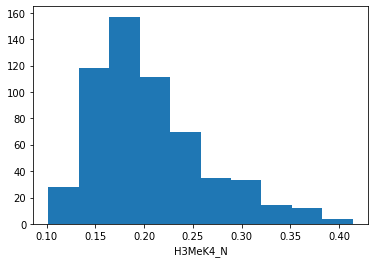

mean = 0.2061054932474226
Varience = 0.0033718896934470245
Skewness = nan
Kurtosis = nan




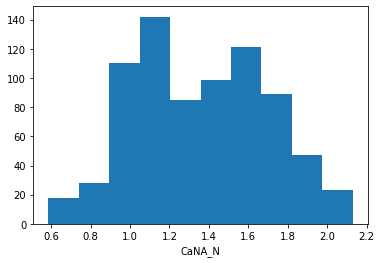

mean = 1.3579535543005252
Varience = 0.11349202852774018
Skewness = 0.11504099645721841
Kurtosis = -0.8686932392982532




In [ ]:
histogram(train_data)

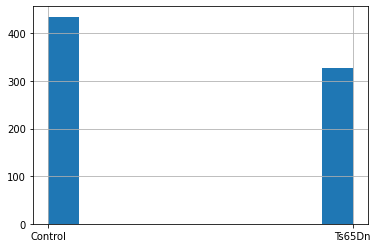

In [ ]:
train_data['Genotype'].hist()
plt.show()

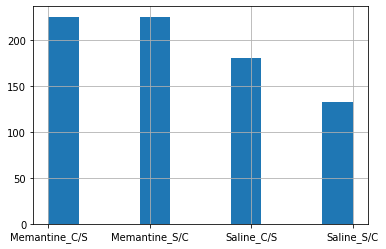

In [ ]:
train_data['Treatment_Behavior'].hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


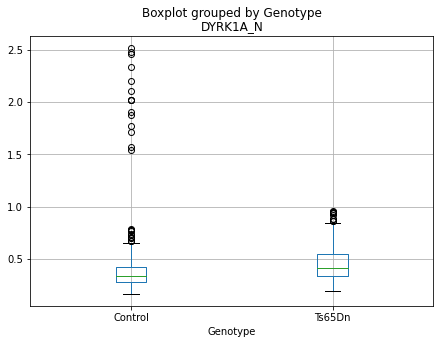

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


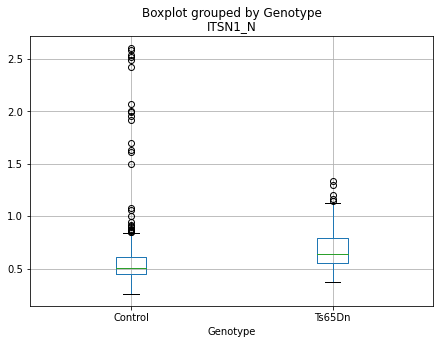

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


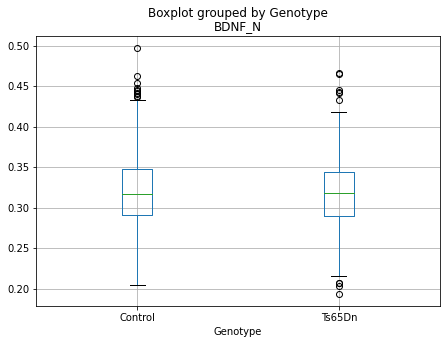

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


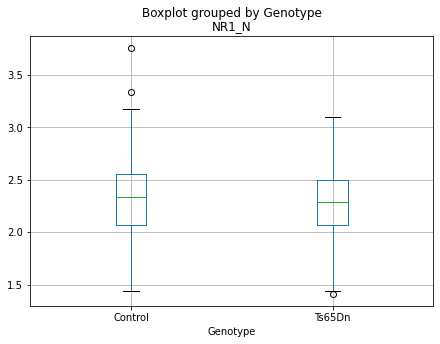

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


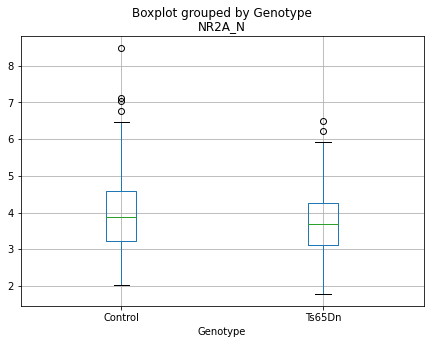

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


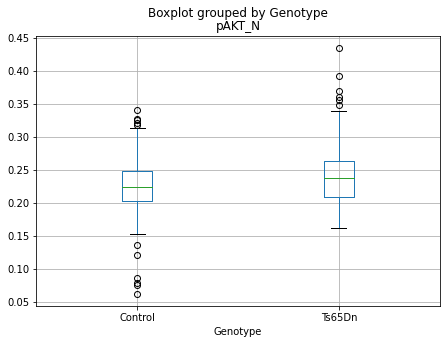

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


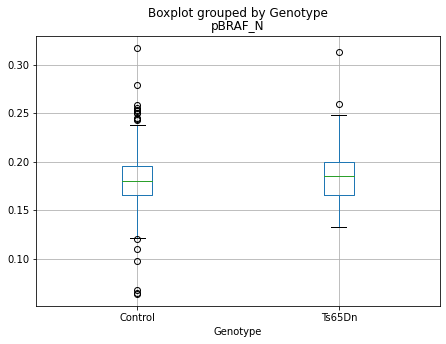

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


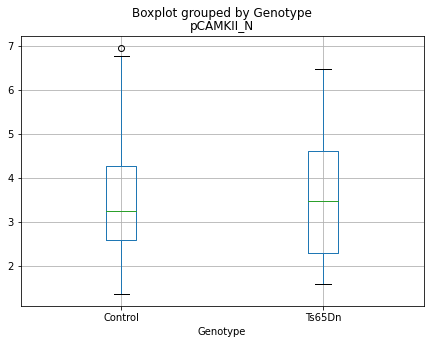

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


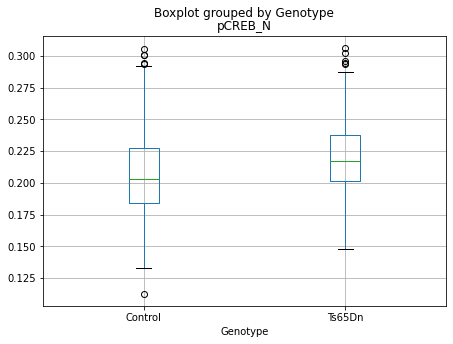

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


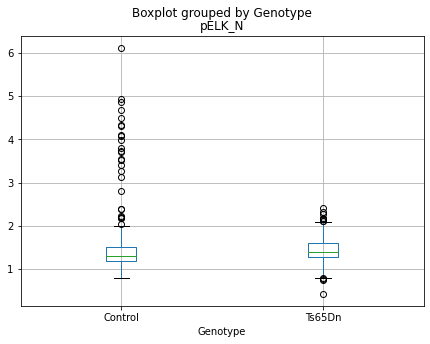

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


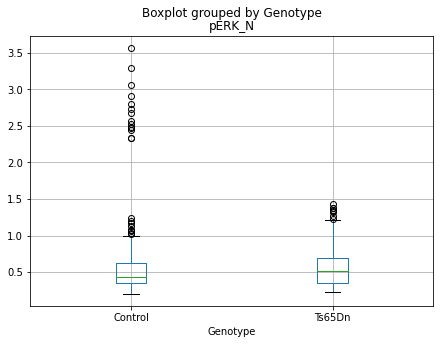

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


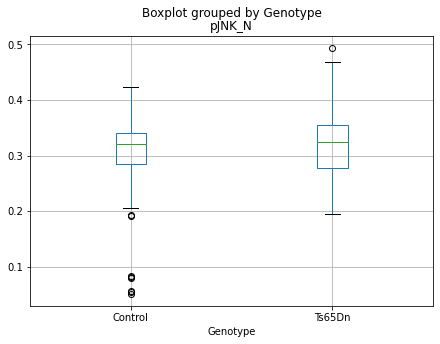

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


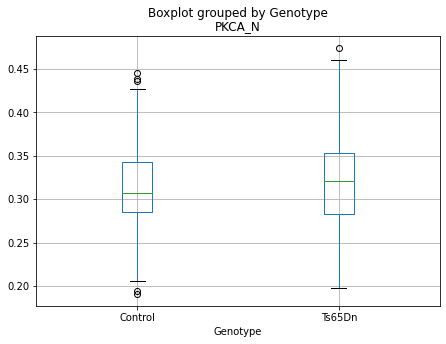

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


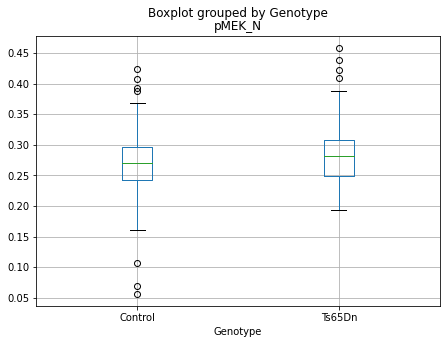

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


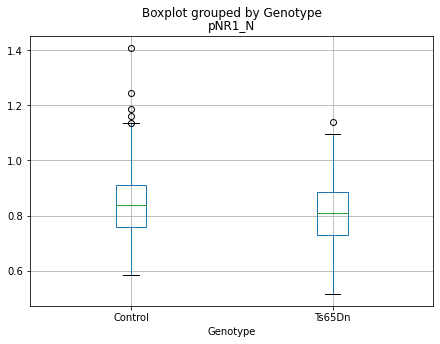

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


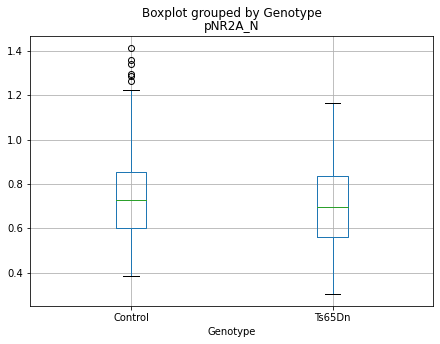

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


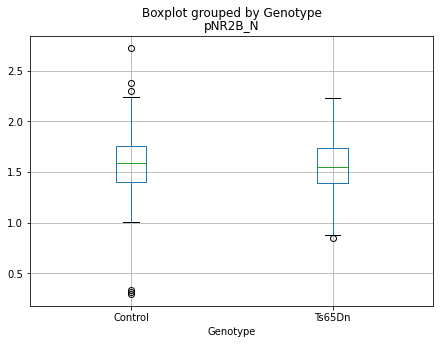

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


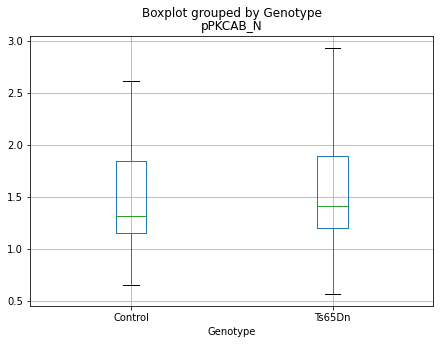

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


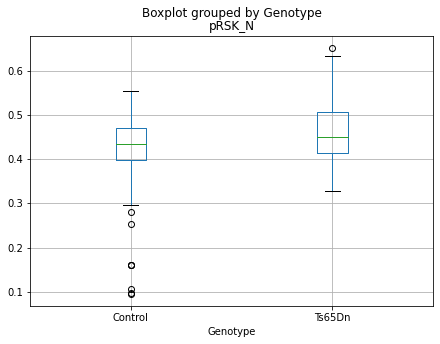

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


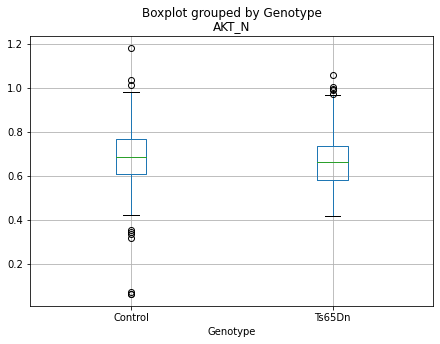

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


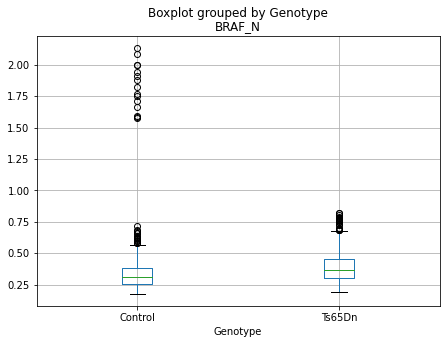

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


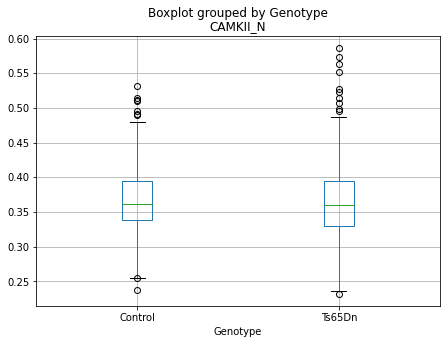

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


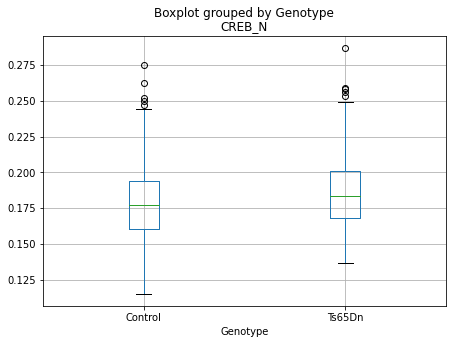

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


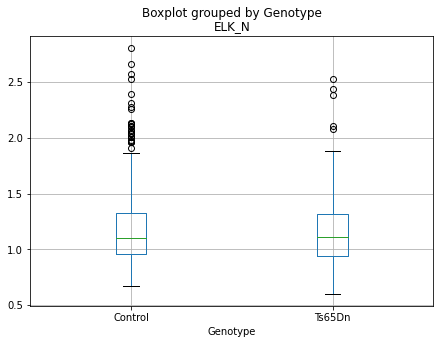

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


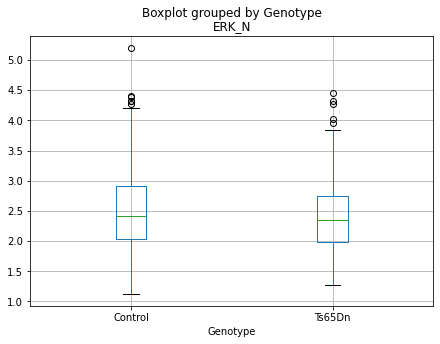

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


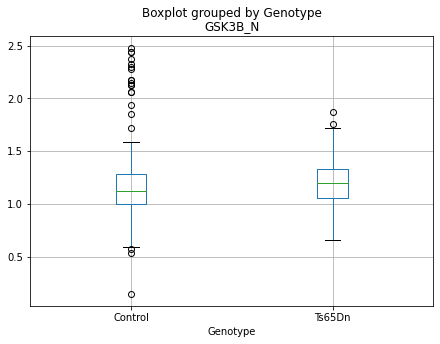

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


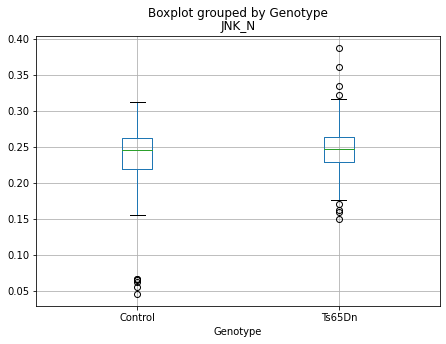

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


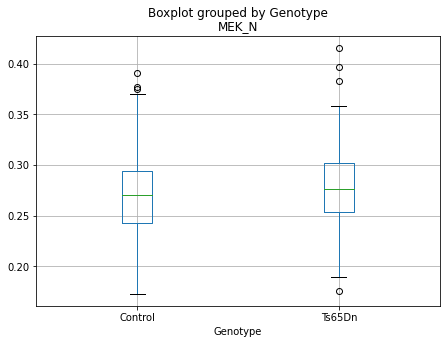

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


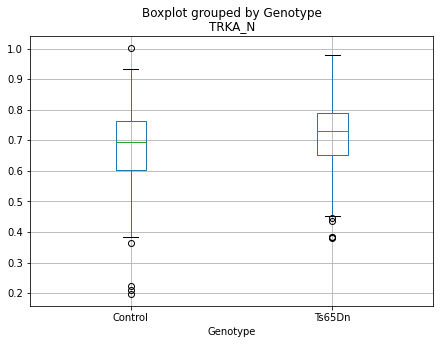

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


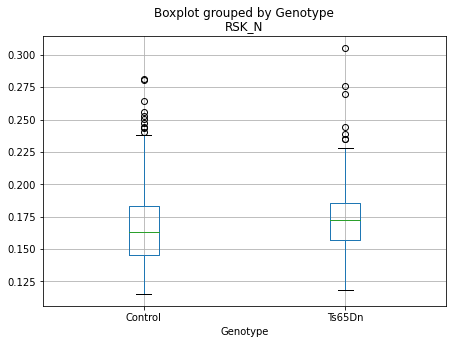

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


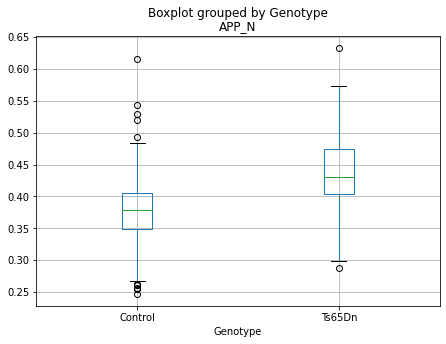

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


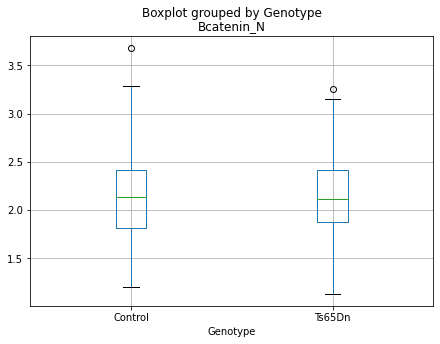

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


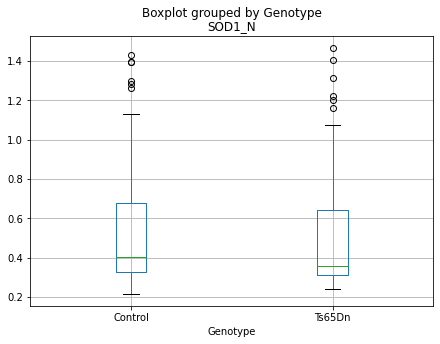

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


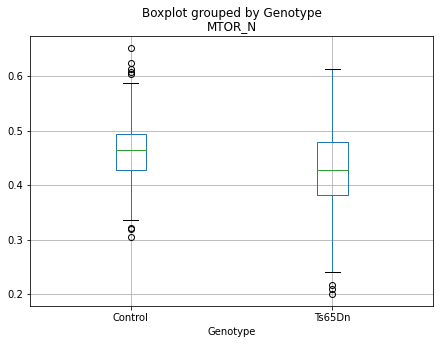

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


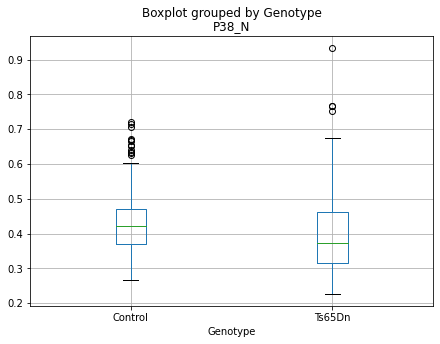

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


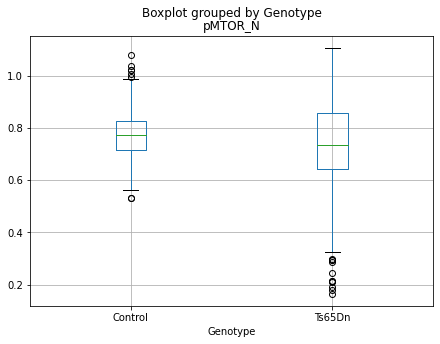

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


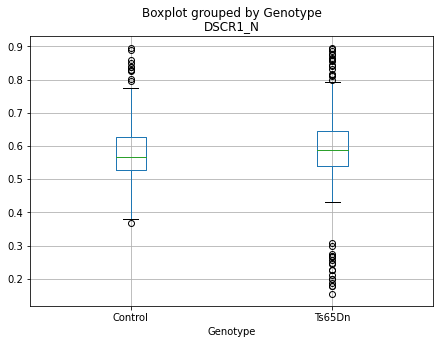

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


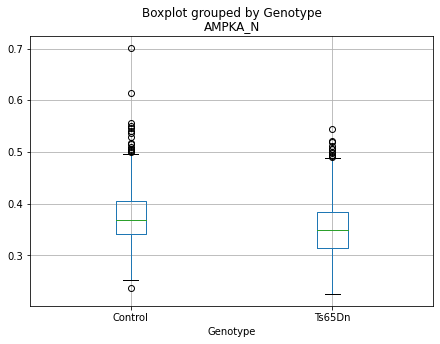

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


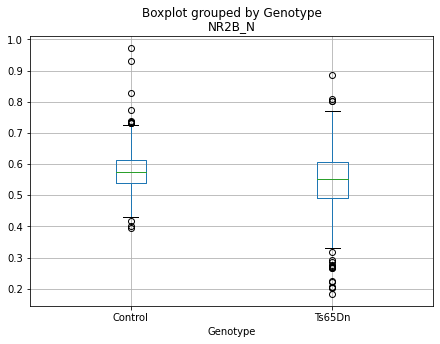

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


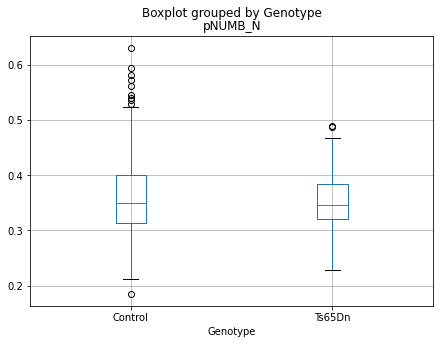

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


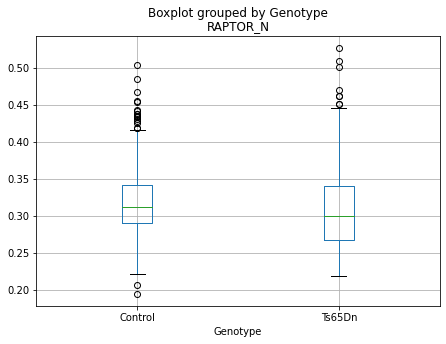

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


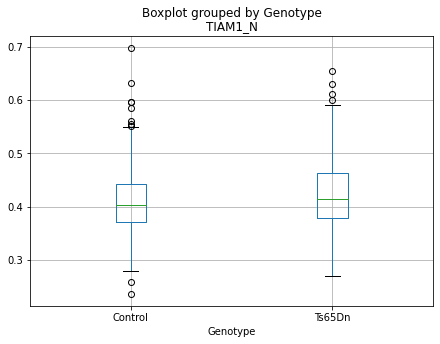

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


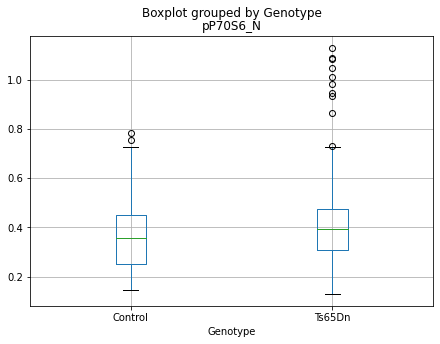

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


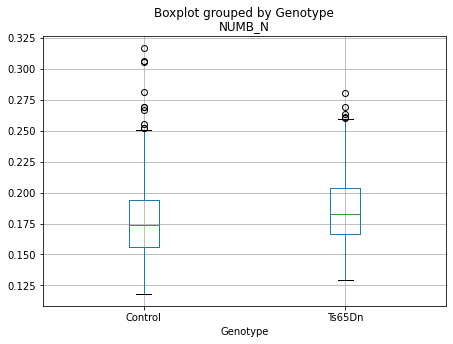

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


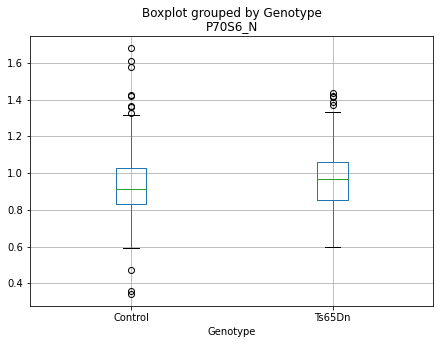

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


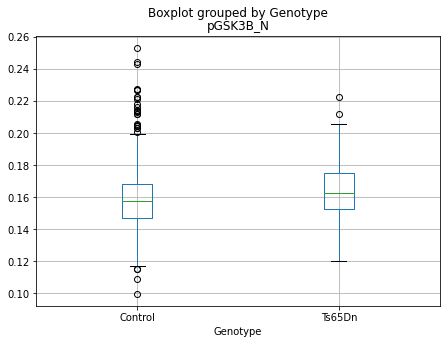

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


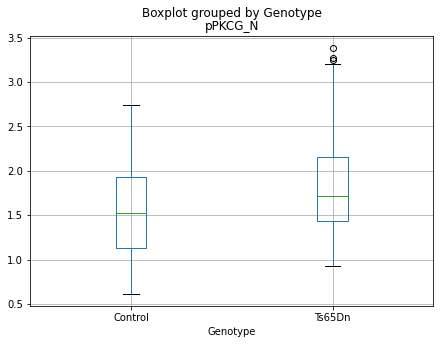

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


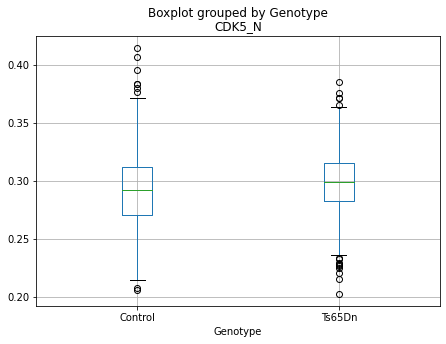

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


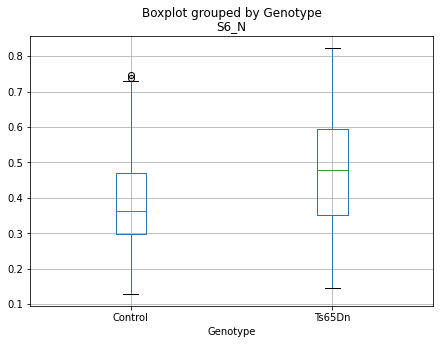

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


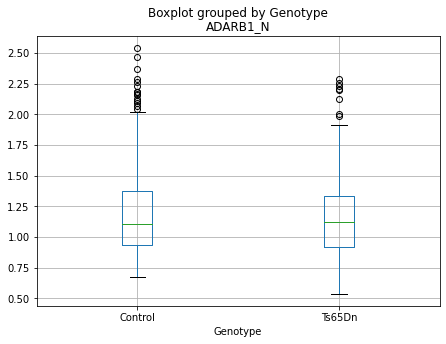

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


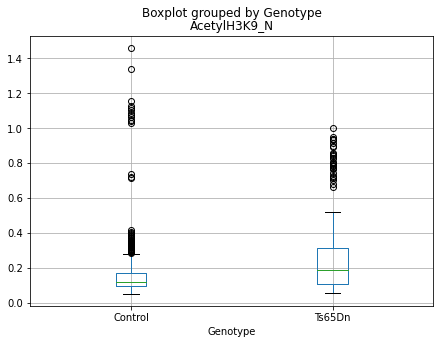

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


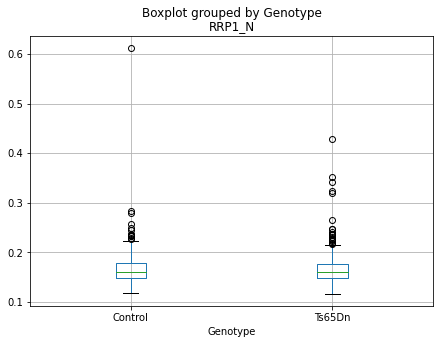

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


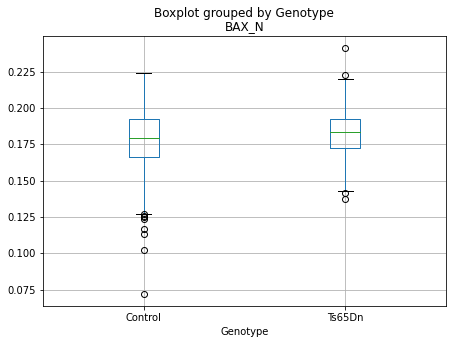

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


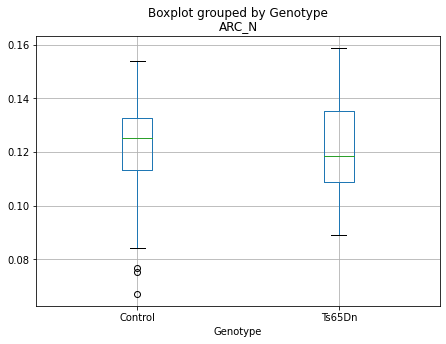

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


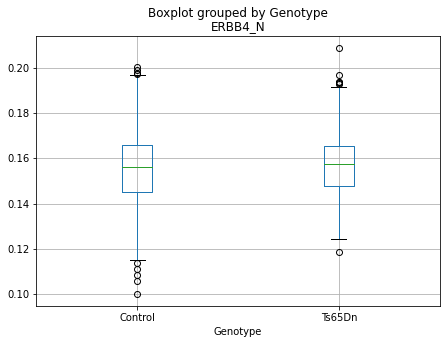

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


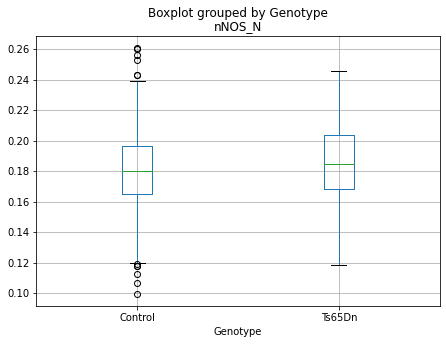

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


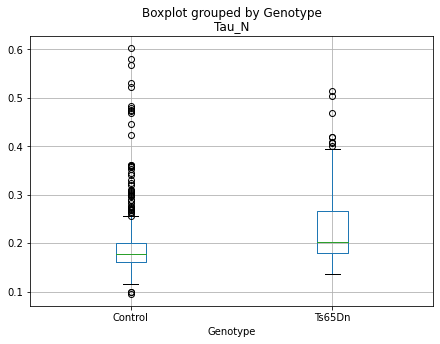

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


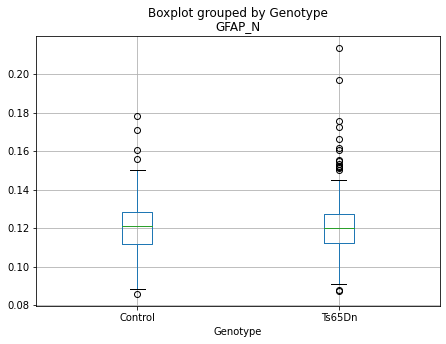

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


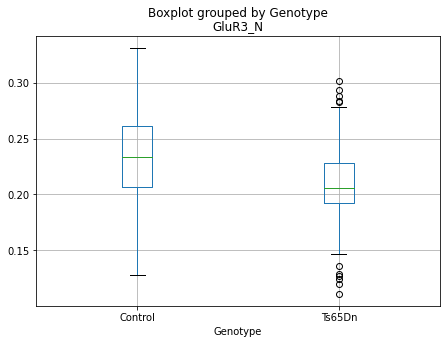

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


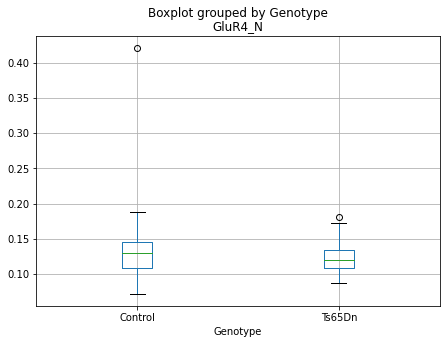

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


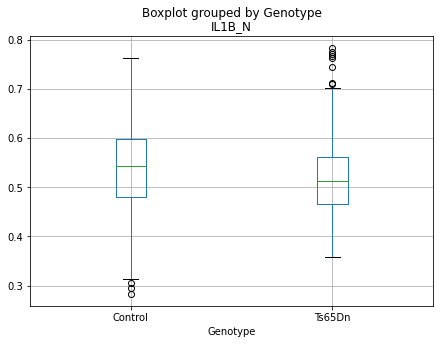

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


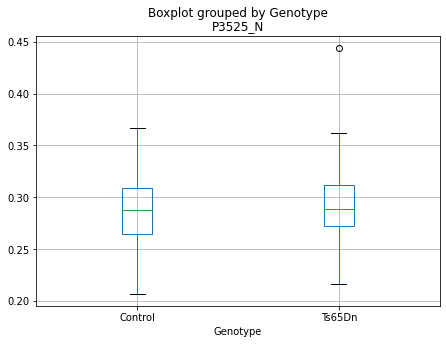

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


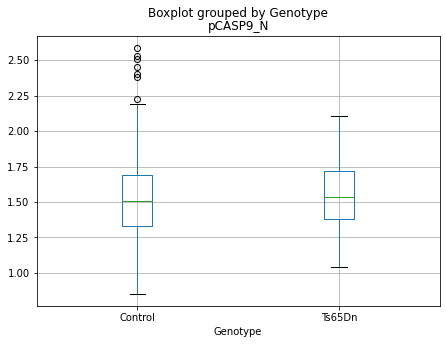

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


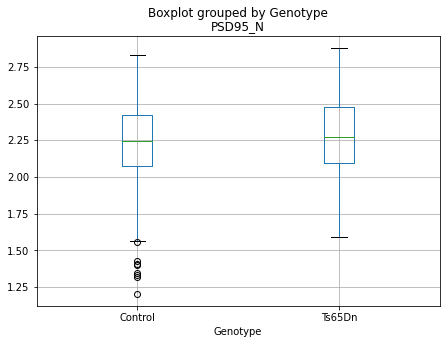

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


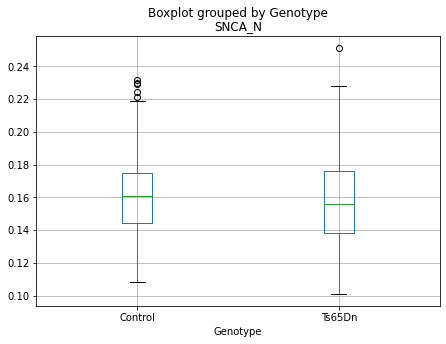

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


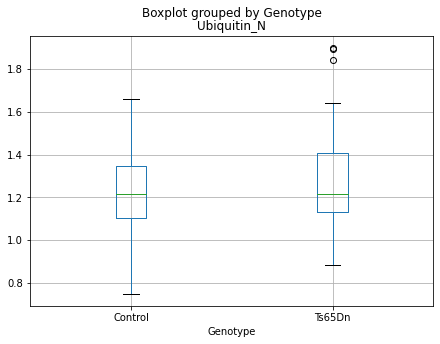

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


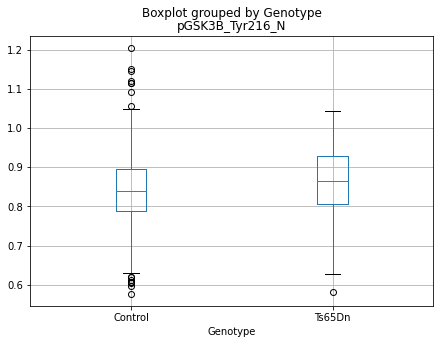

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


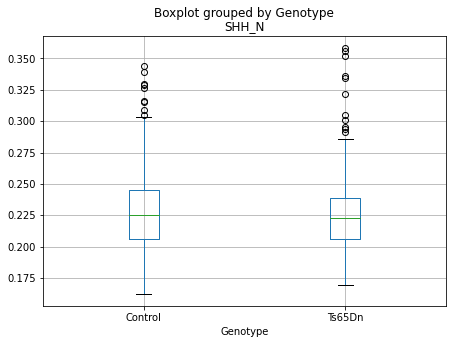

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


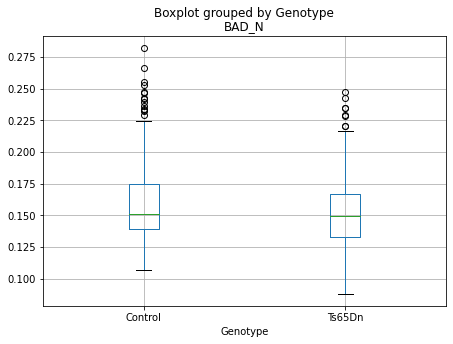

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


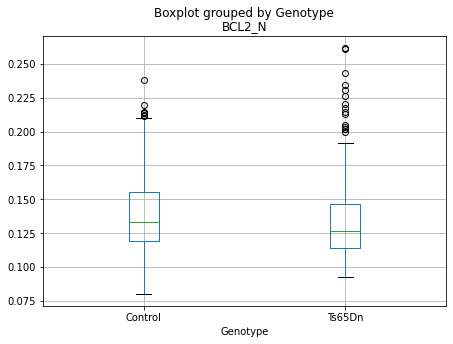

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


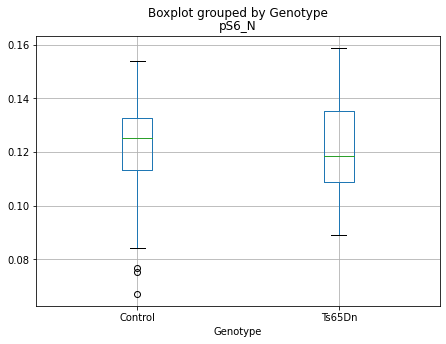

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


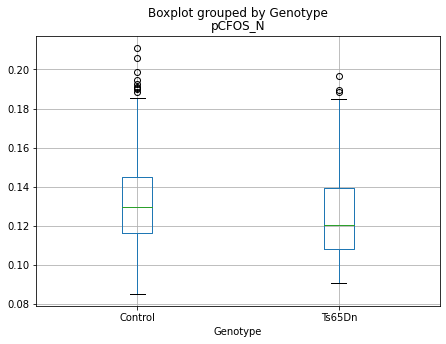

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


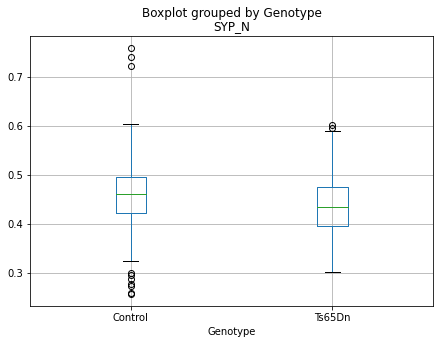

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


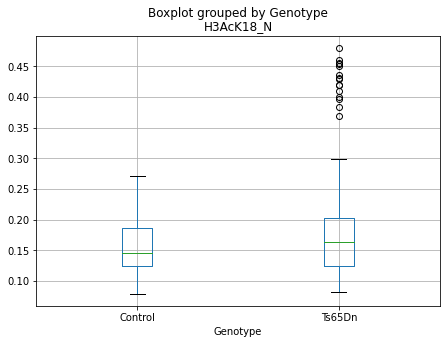

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


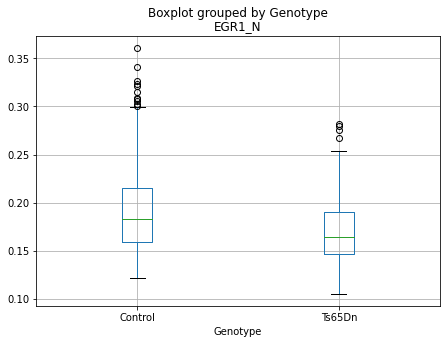

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


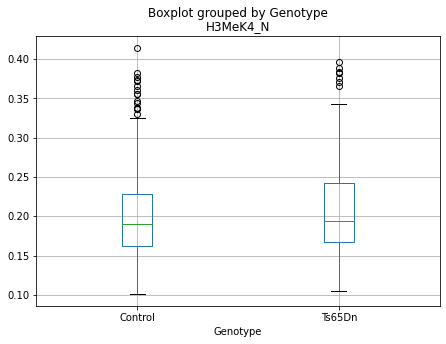

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


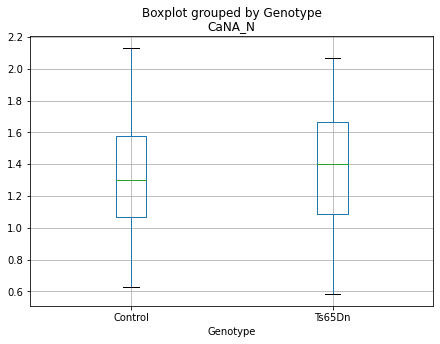

In [ ]:
#Box plot to see whether the protein is useful for classificatio for both byclass and multiclass 
for col in train_data.columns:
  if (train_data[col].dtypes == 'float64'):
    train_data.boxplot(by = 'Genotype', column = col, grid = True, figsize = (7,5))
    plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


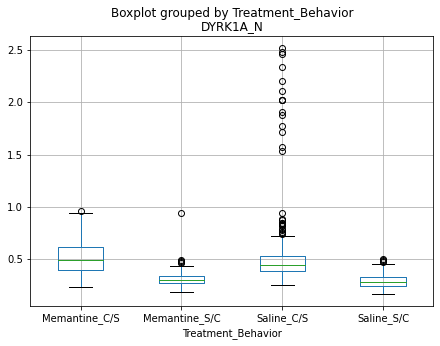

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


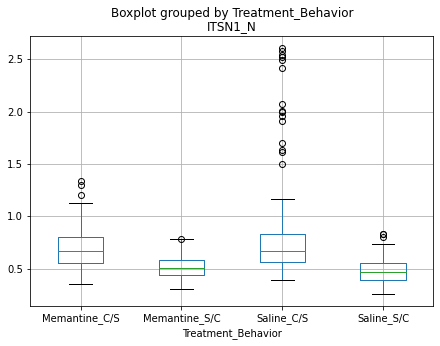

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


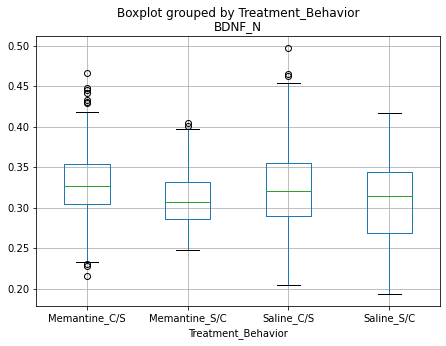

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


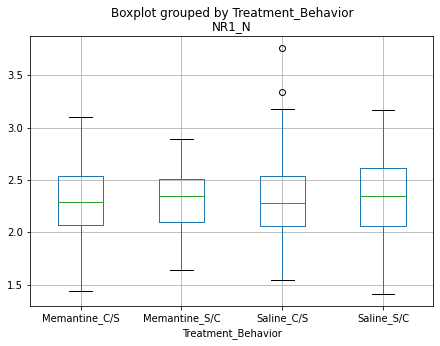

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


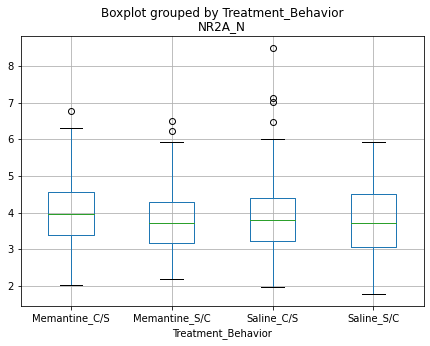

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


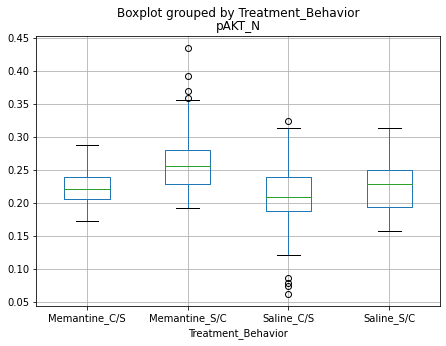

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


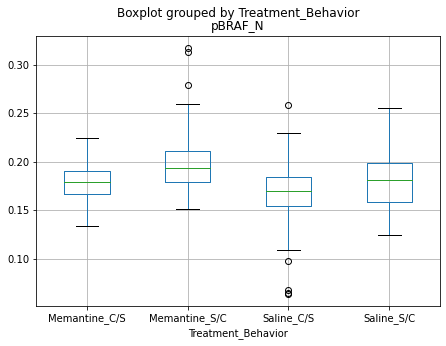

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


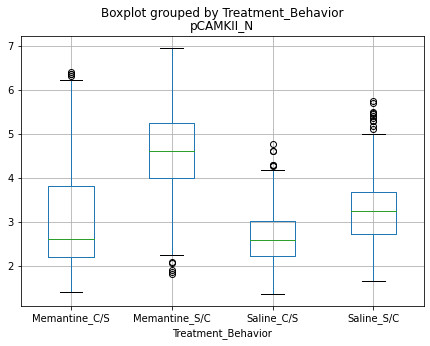

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


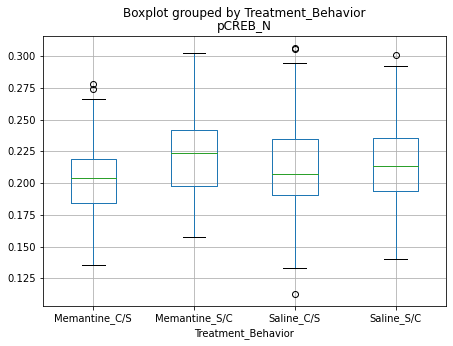

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


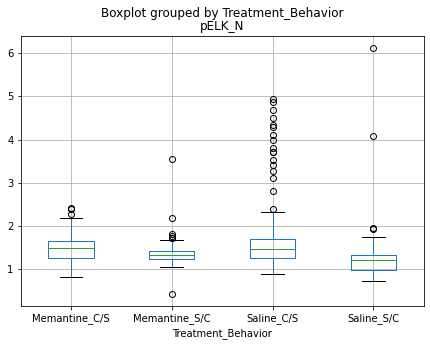

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


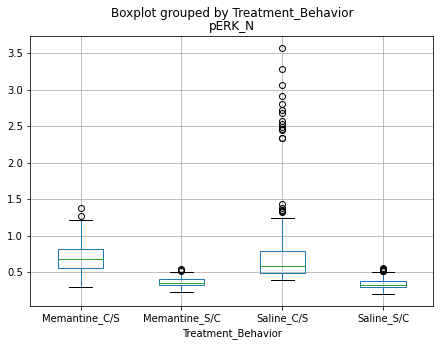

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


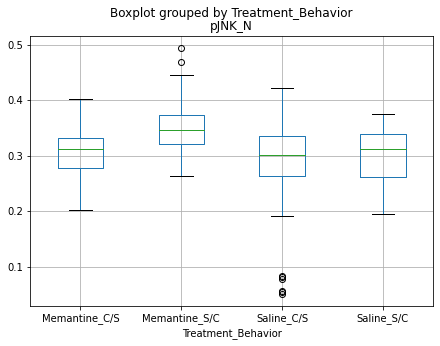

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


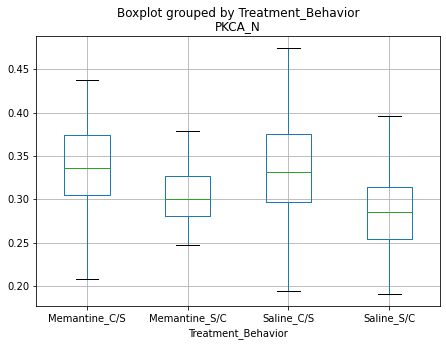

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


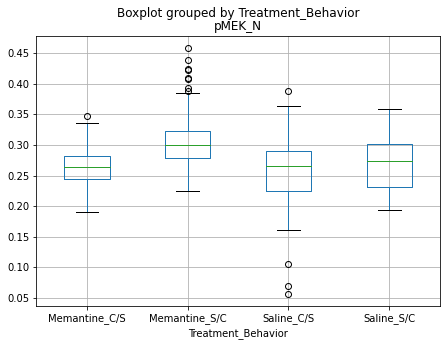

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


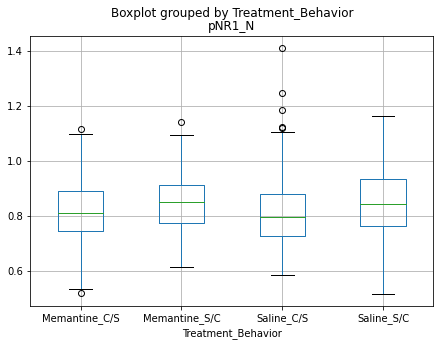

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


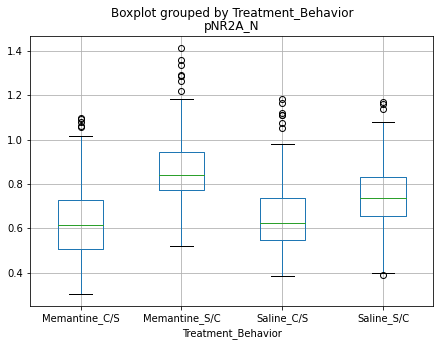

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


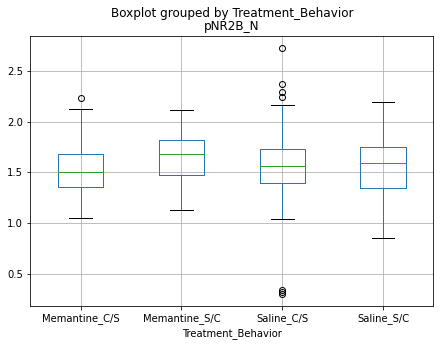

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


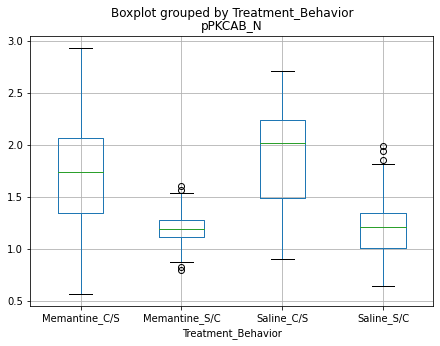

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


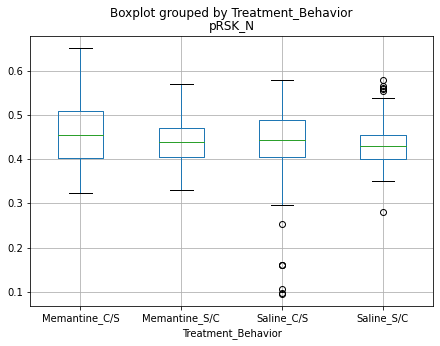

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


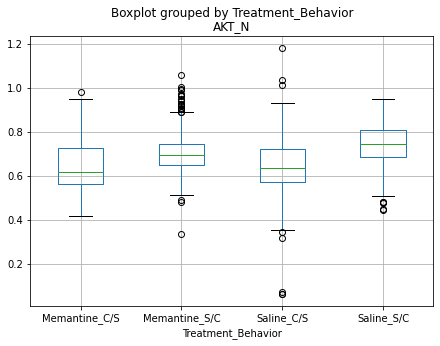

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


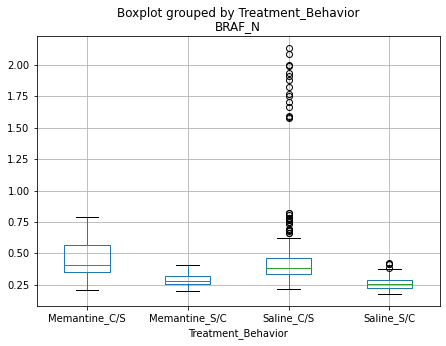

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


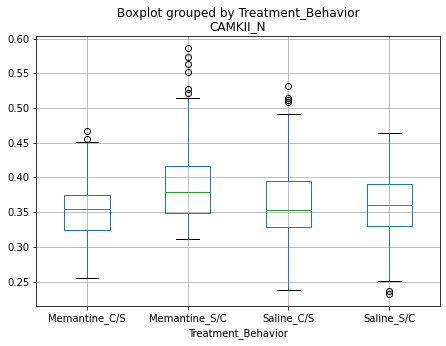

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


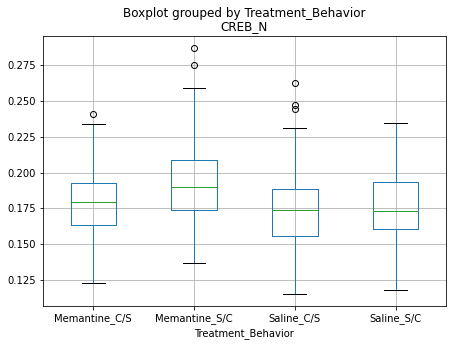

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


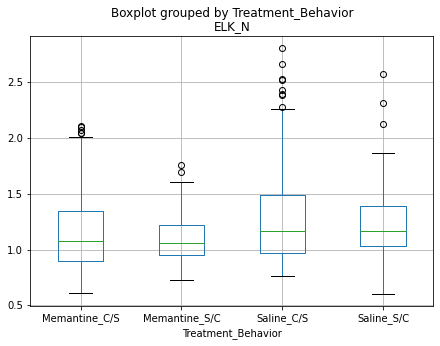

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


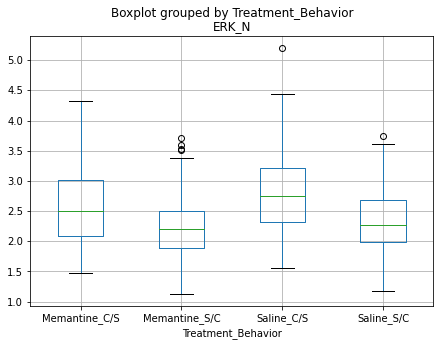

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


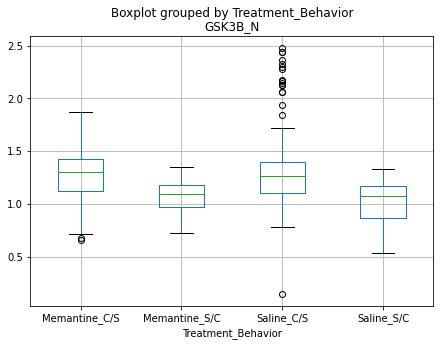

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


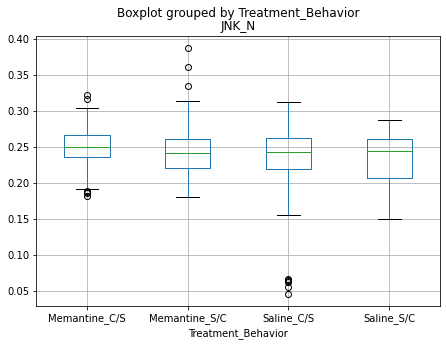

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


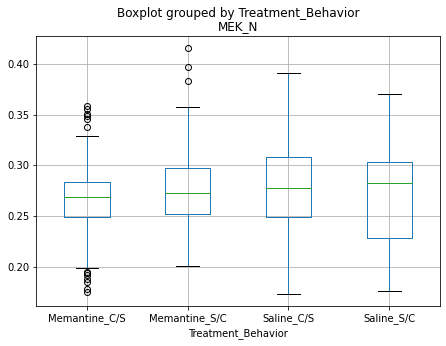

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


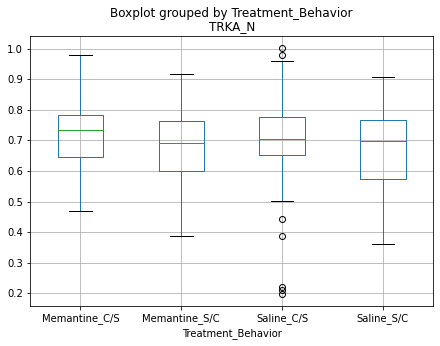

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


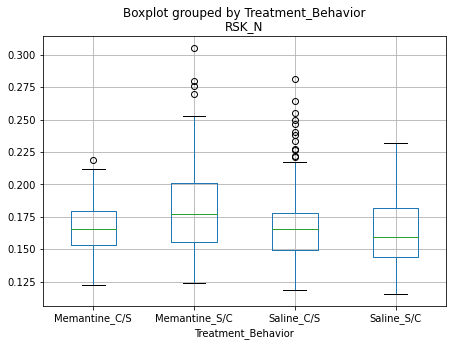

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


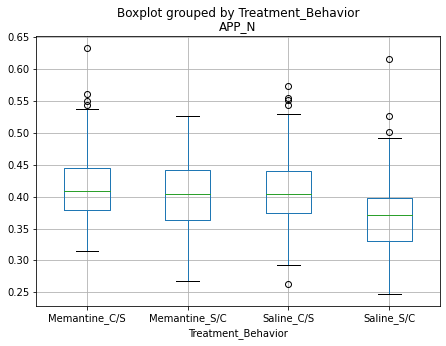

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


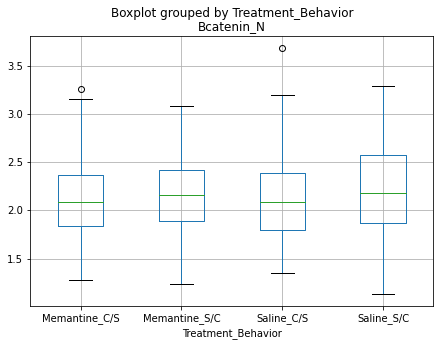

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


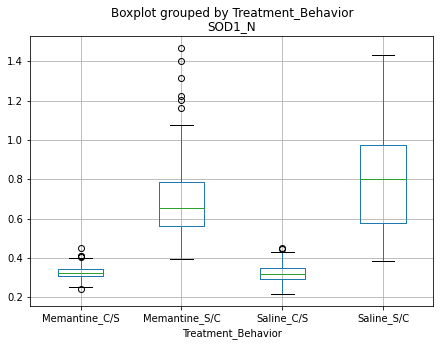

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


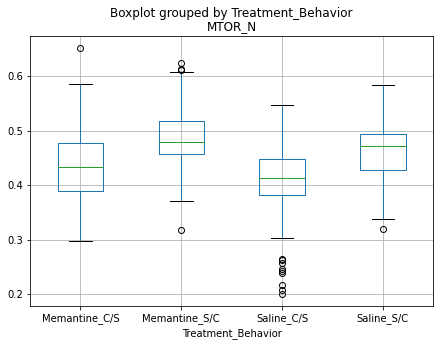

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


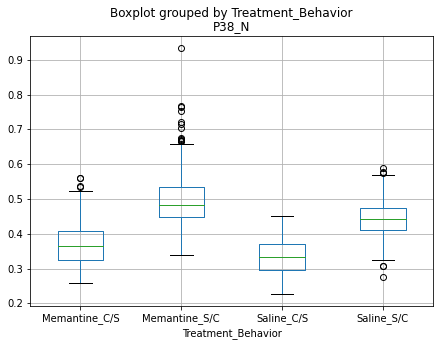

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


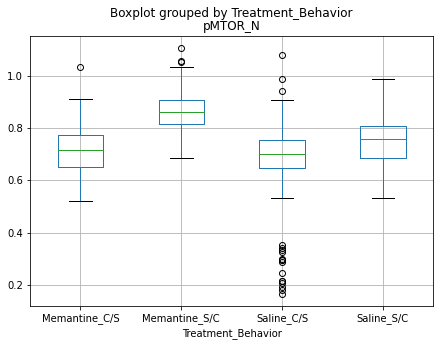

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


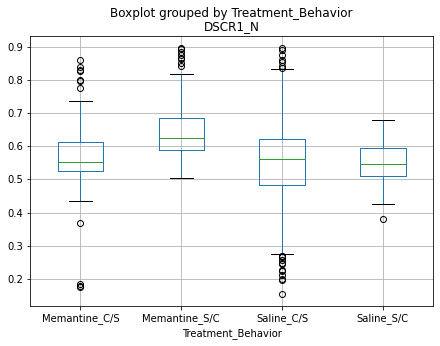

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


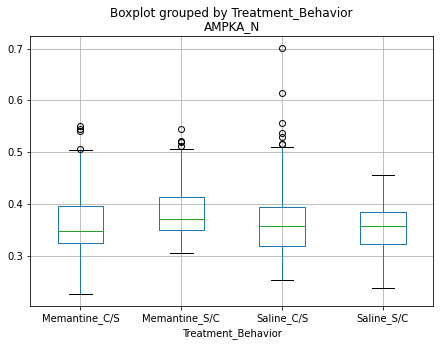

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


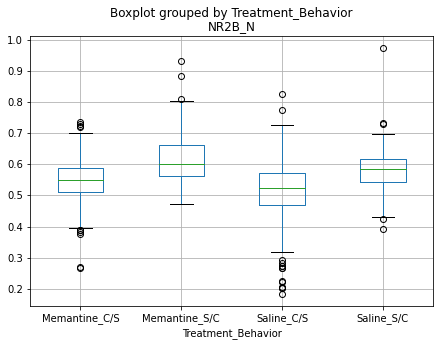

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


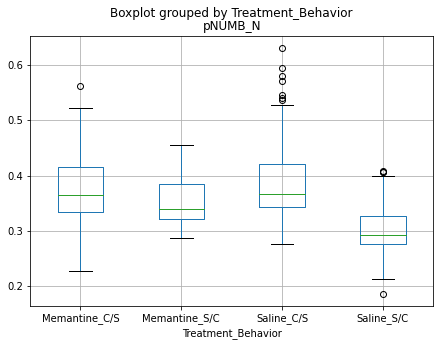

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


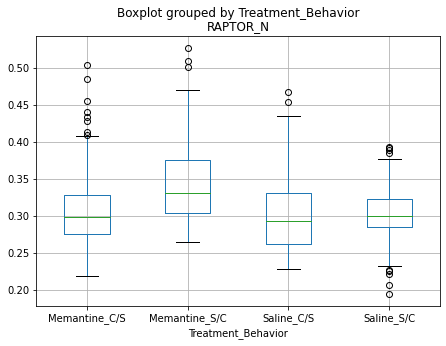

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


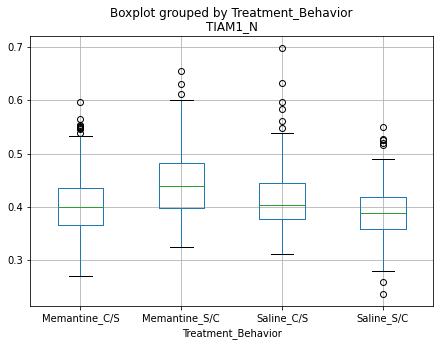

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


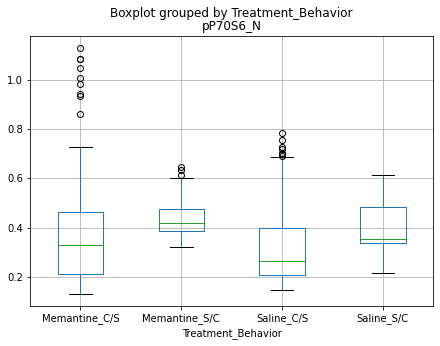

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


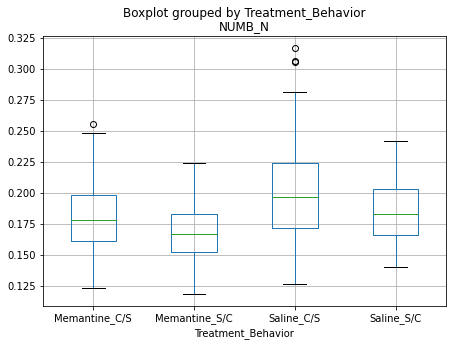

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


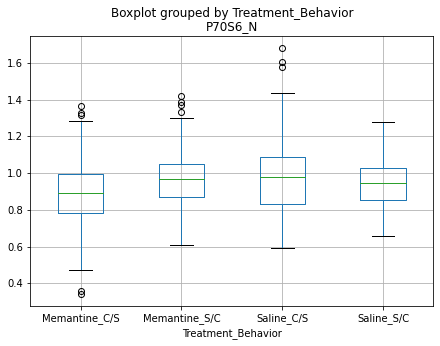

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


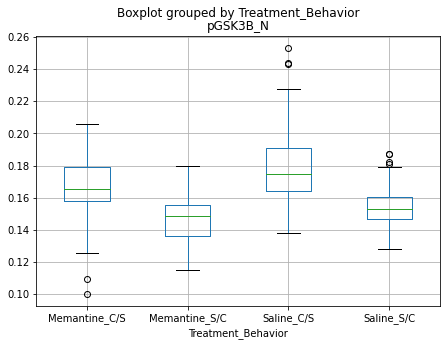

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


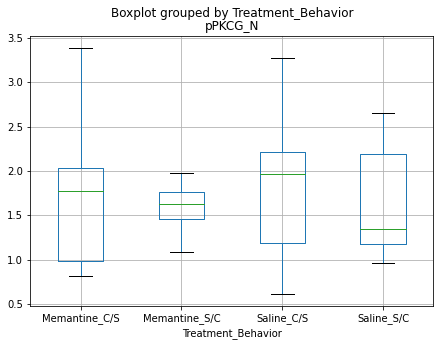

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


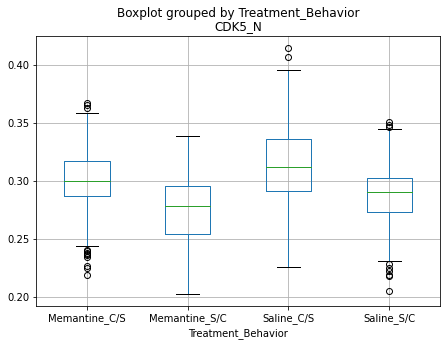

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


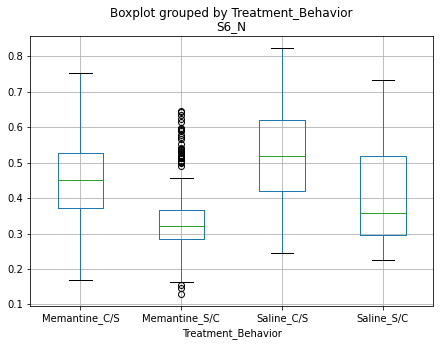

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


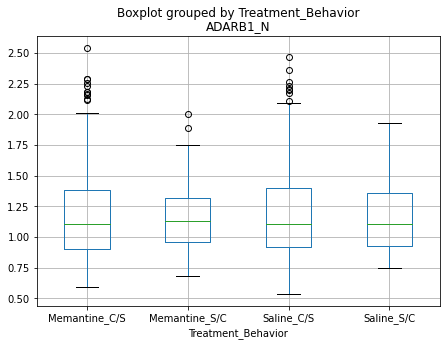

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


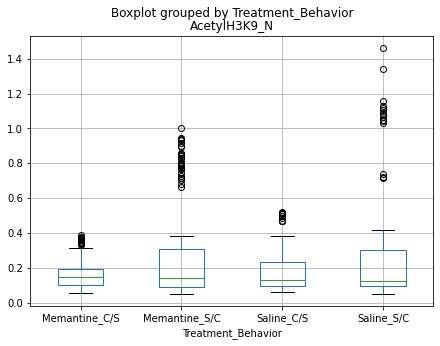

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


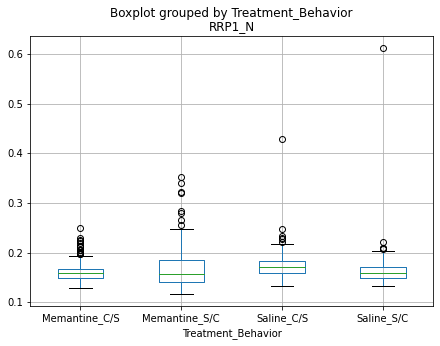

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


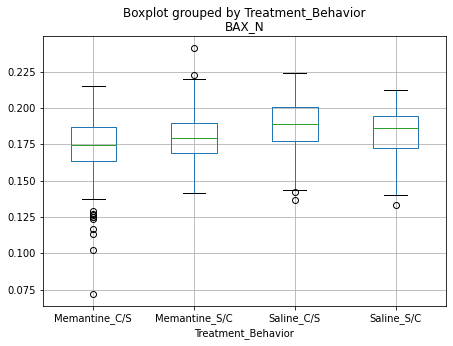

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


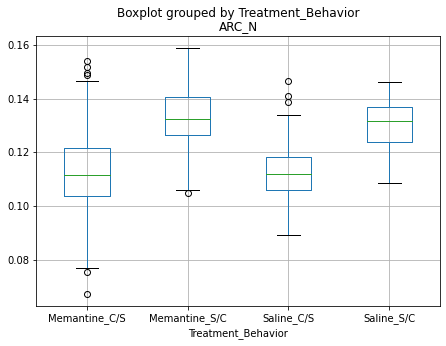

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


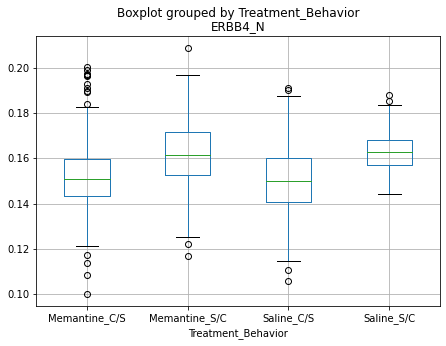

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


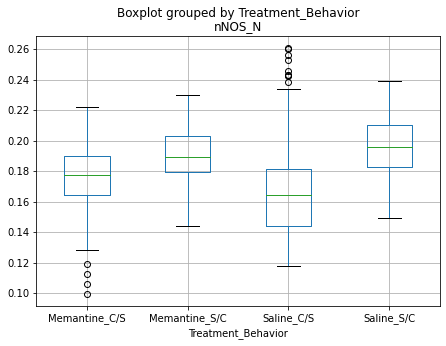

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


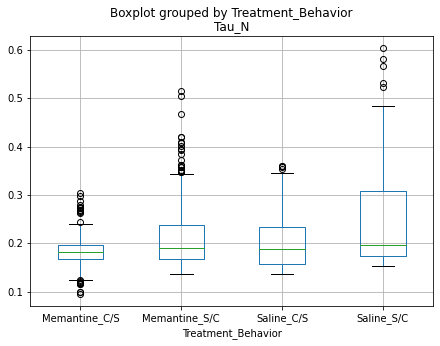

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


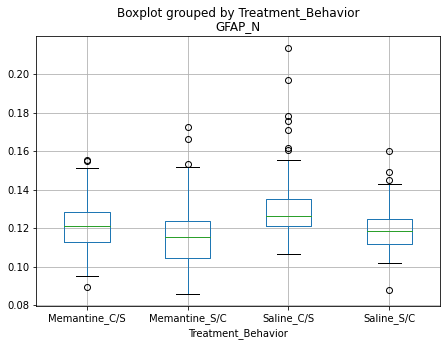

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


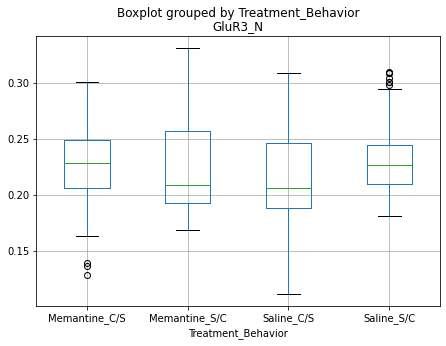

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


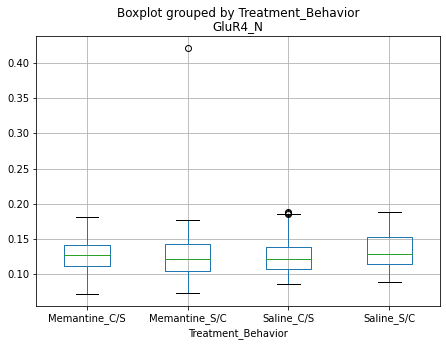

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


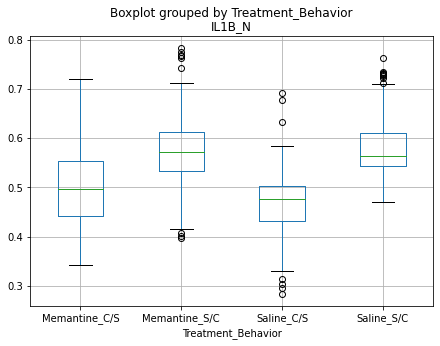

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


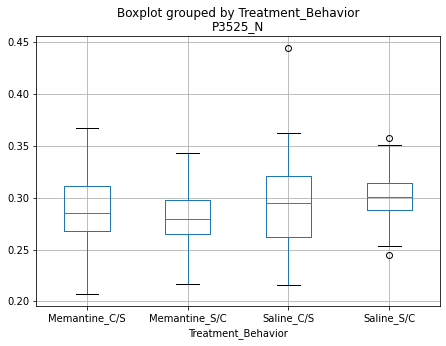

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


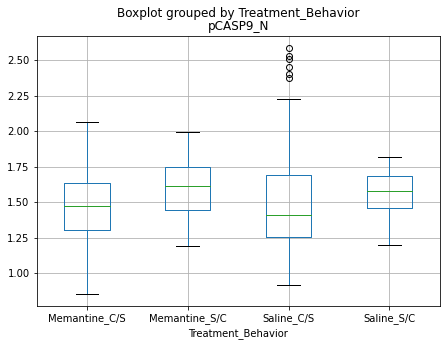

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


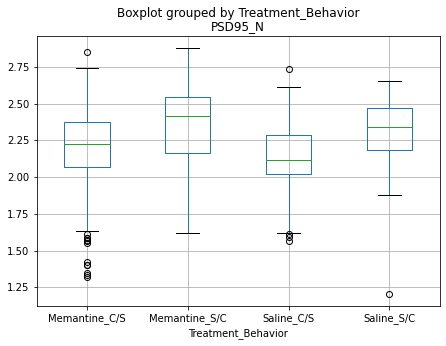

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


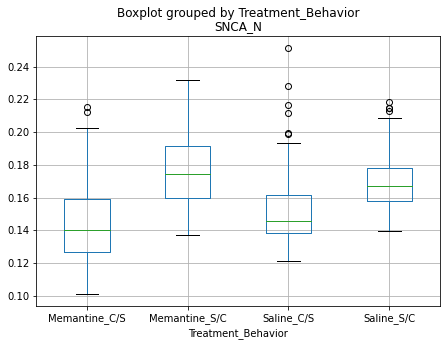

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


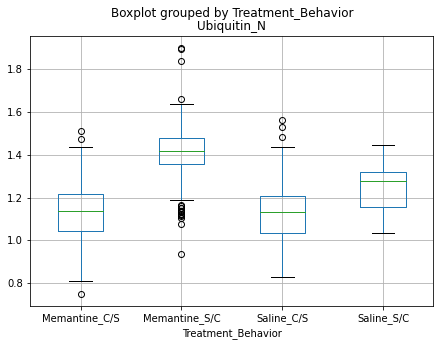

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


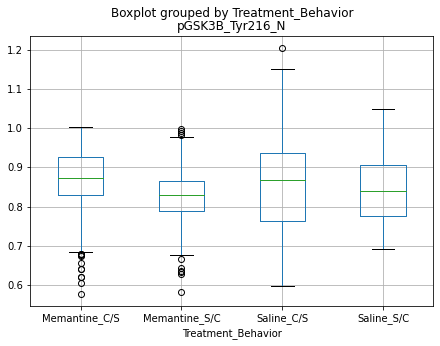

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


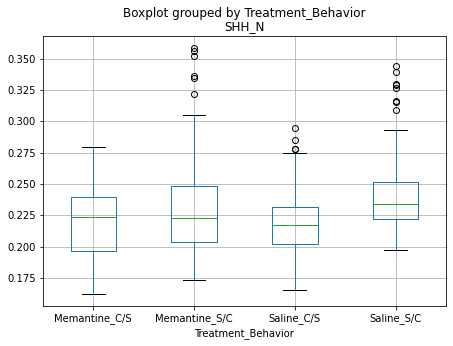

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


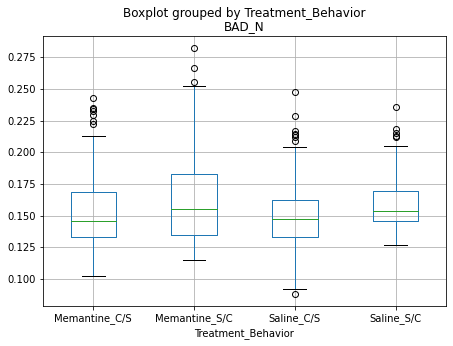

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


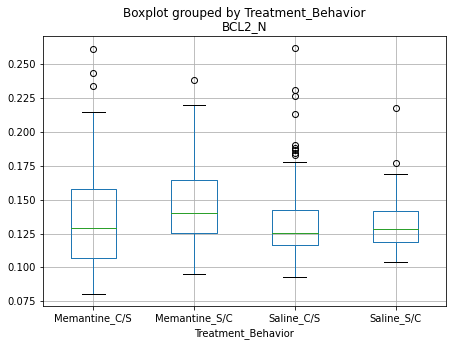

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


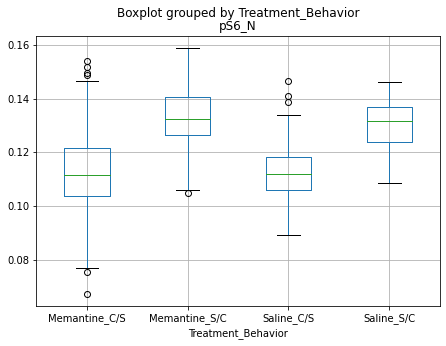

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


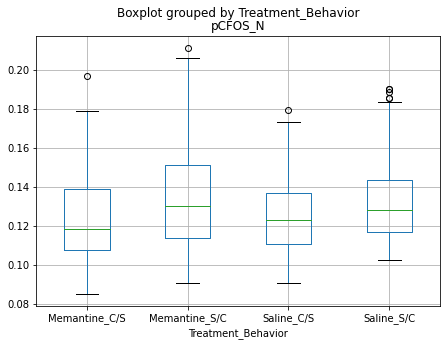

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


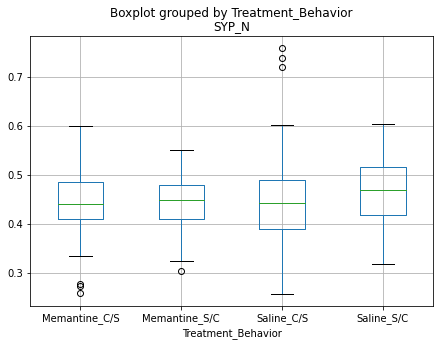

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


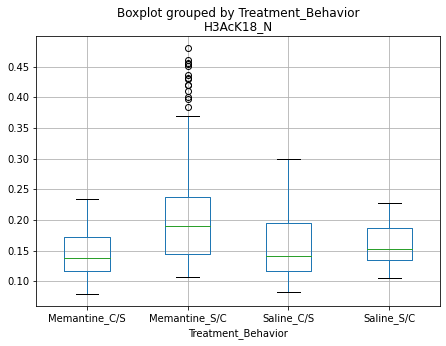

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


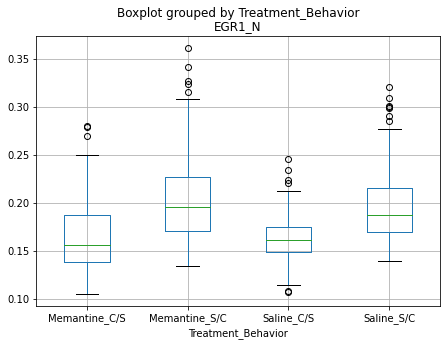

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


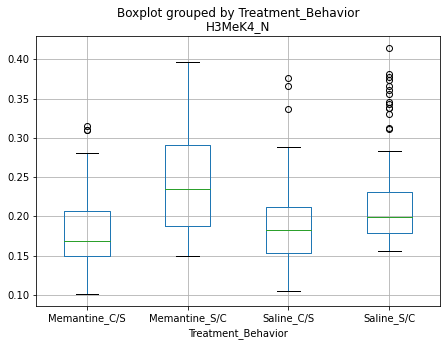

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


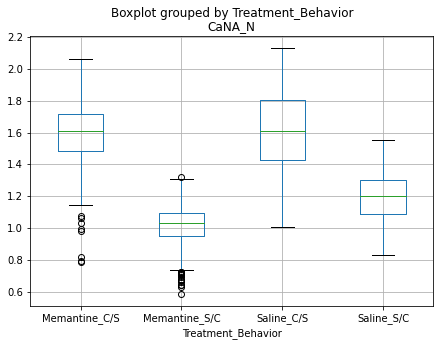

In [ ]:
for col in train_data.columns.values:
  if (train_data[col].dtypes == 'float64'):
    train_data.boxplot(column = col, by = 'Treatment_Behavior',  grid = True, figsize = (7,5))
    plt.show()

Some of the proteins (For ex. JNK_N have same mean for both class) are not useful they can be eliminated later

# **2. Perform exploratory data analysis to find out:**
a. Which variables are usable, and which are not?

###   About 33 variables from 77 are useful

b. Are there significant correlations among variables?

###      yes

c. Are the classes balanced?

   NO, from histogram we can see the classes are not balanced

# **Imputation**

In [ ]:
def Missing_val(Dataframe):
  #print(Dataframe.shape[0])
  #print(Dataframe.dropna().shape[0])
  null_val = Dataframe.isnull().sum()
  print(null_val)
  print("Total missing values")
  print(Dataframe.shape[0] - Dataframe.dropna().shape[0])
  print("Incomplete data = "+ str(((Dataframe.shape[0] - Dataframe.dropna().shape[0])/Dataframe.shape[0])*100)+ " % of the total data" )
  null_val.plot(kind = 'bar', figsize = (25, 10), color = 'r', width = 0.7)
  plt.show()

Ref:
https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

In [ ]:
def Imputation(Dataframe):
  df = Dataframe.iloc[: , :-2]
  # Using median to impute the missing values
  for i in df.columns:
    Dataframe.loc[Dataframe.loc[:,i].isnull(),i] = Dataframe.loc[:,i].median()
  return Dataframe

DYRK1A_N                0
ITSN1_N                 0
BDNF_N                  0
NR1_N                   0
NR2A_N                  0
                     ... 
EGR1_N                180
H3MeK4_N              180
CaNA_N                  0
Genotype                0
Treatment_Behavior      0
Length: 79, dtype: int64
Total missing values
375
Incomplete data = 49.21259842519685 % of the total data


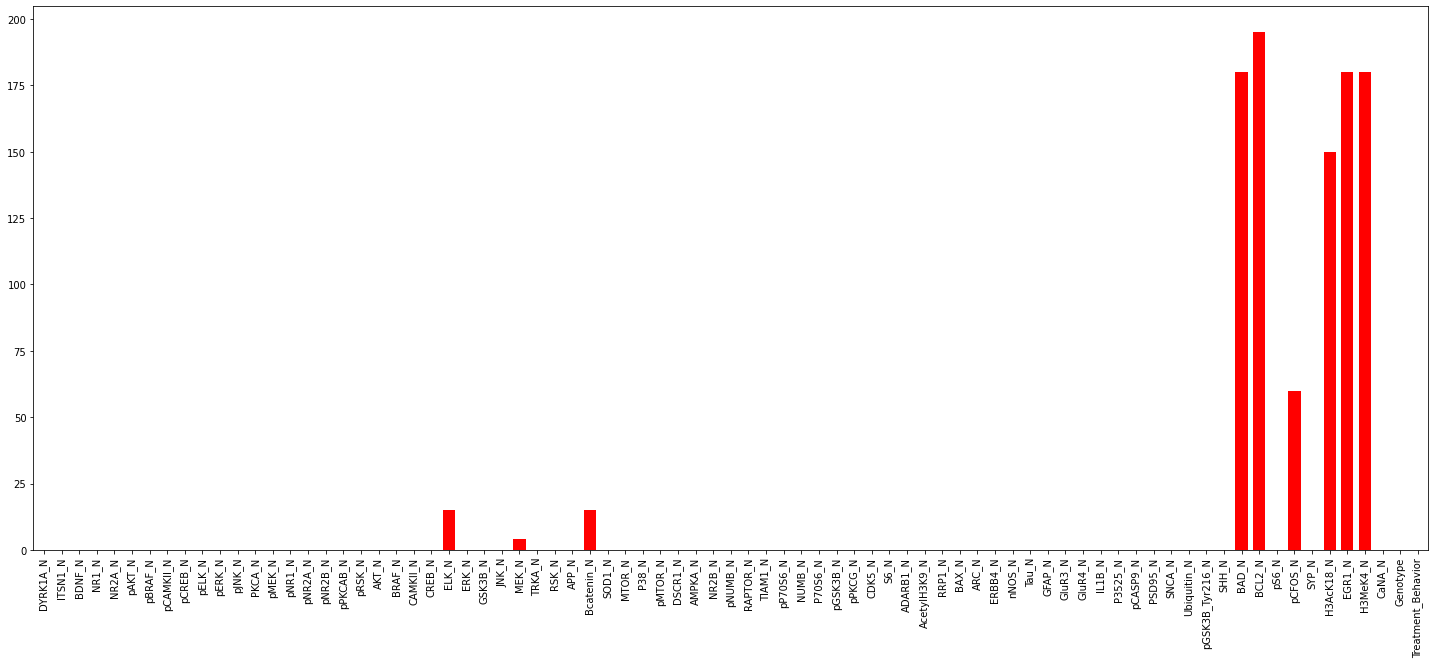

In [ ]:
Missing_val(train_data)

From bar graph we could see some variables have empty cells, they need to be imputed

DYRK1A_N              0
ITSN1_N               0
BDNF_N                0
NR1_N                 0
NR2A_N                0
                     ..
EGR1_N                0
H3MeK4_N              0
CaNA_N                0
Genotype              0
Treatment_Behavior    0
Length: 79, dtype: int64
Total missing values
0
Incomplete data = 0.0 % of the total data


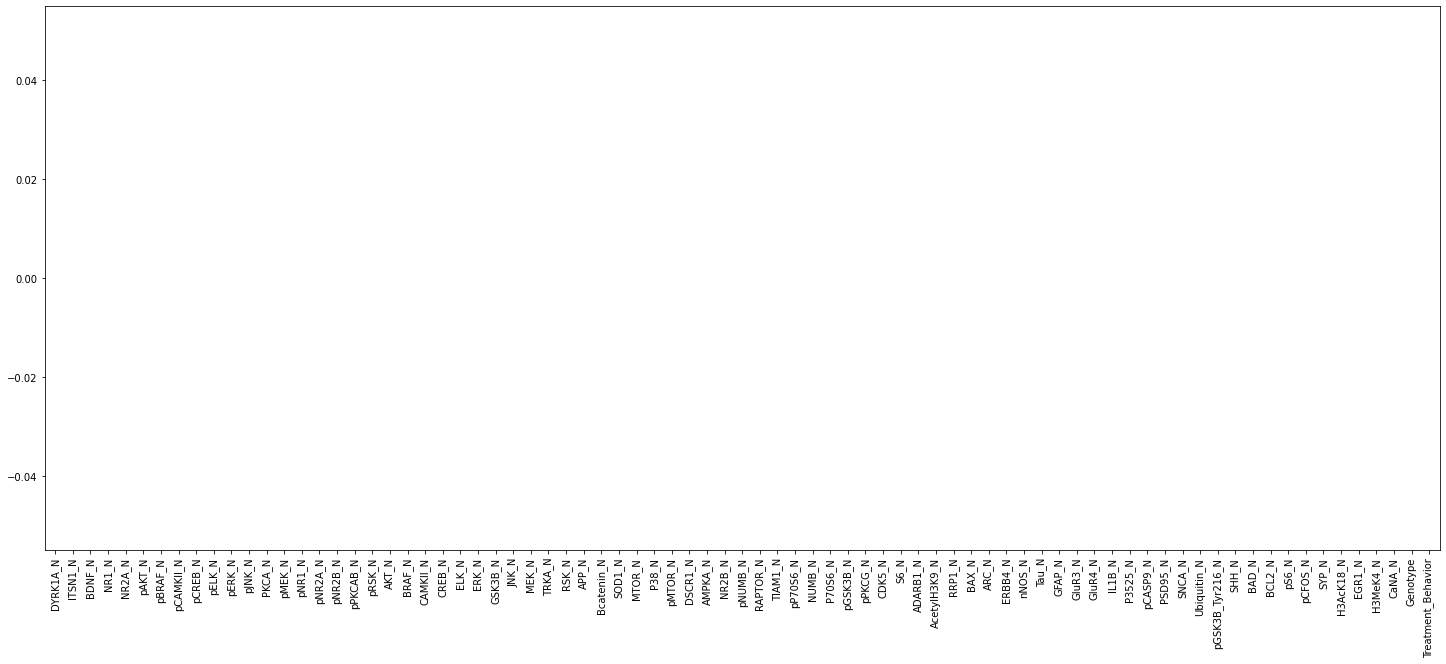

In [ ]:
Impute_data = Imputation(train_data.copy())
Missing_val(Impute_data)

After imputation there is no missing values

In [ ]:
#dropping correlated variables
Feature_eli_data = Impute_data.drop(unusable_var, axis = 1)
Feature_eli_data 

,pCAMKII_N,pCREB_N,pRSK_N,BRAF_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,pNUMB_N,TIAM1_N,...,pCASP9_N,PSD95_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,2.373744,0.232224,0.441599,0.416289,0.165846,0.453910,3.037621,0.369510,0.394721,0.482864,...,1.603310,2.014875,0.831557,0.188852,0.106305,0.427099,0.128186,1.675652,Control,Memantine_C/S
1,2.292150,0.226972,0.445222,0.400364,0.157194,0.430940,2.921882,0.342279,0.368255,0.454519,...,1.671738,2.004605,0.849270,0.200404,0.106592,0.441581,0.131119,1.743610,Control,Memantine_C/S
2,2.283337,0.230247,0.467668,0.399847,0.160895,0.423187,2.944136,0.343696,0.363880,0.447197,...,1.663550,2.016831,0.846709,0.193685,0.108303,0.435777,0.127431,1.926427,Control,Memantine_C/S
3,2.152301,0.207004,0.477671,0.385639,0.162210,0.410615,2.500204,0.344509,0.366771,0.442650,...,1.484624,1.957233,0.833277,0.192112,0.103184,0.391691,0.146901,1.700563,Control,Memantine_C/S
4,2.134014,0.192158,0.483416,0.367531,0.154827,0.398550,2.456560,0.329126,0.351551,0.419095,...,1.534835,2.009109,0.878668,0.205604,0.104784,0.434154,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,3.208804,0.221809,0.499929,0.338002,0.170787,0.411033,2.107475,0.599971,0.340146,0.409175,...,1.622850,2.236925,1.001404,0.216128,0.119428,0.441207,0.190681,1.474465,Ts65Dn,Saline_S/C
758,3.384350,0.231899,0.536801,0.350772,0.179883,0.440714,2.178384,0.620297,0.377005,0.431420,...,1.657617,2.274556,1.043402,0.209717,0.118081,0.444913,0.197944,1.516605,Ts65Dn,Saline_S/C
759,3.006364,0.223455,0.510545,0.352364,0.188000,0.416909,1.926545,0.586545,0.364545,0.438909,...,1.504094,2.107139,0.948795,0.211279,0.116134,0.422789,0.191212,1.433514,Ts65Dn,Saline_S/C
760,2.948221,0.217506,0.490490,0.350123,0.182106,0.410004,1.900317,0.568686,0.346953,0.414406,...,1.568203,2.212959,0.995884,0.197436,0.120649,0.459901,0.213899,1.543274,Ts65Dn,Saline_S/C


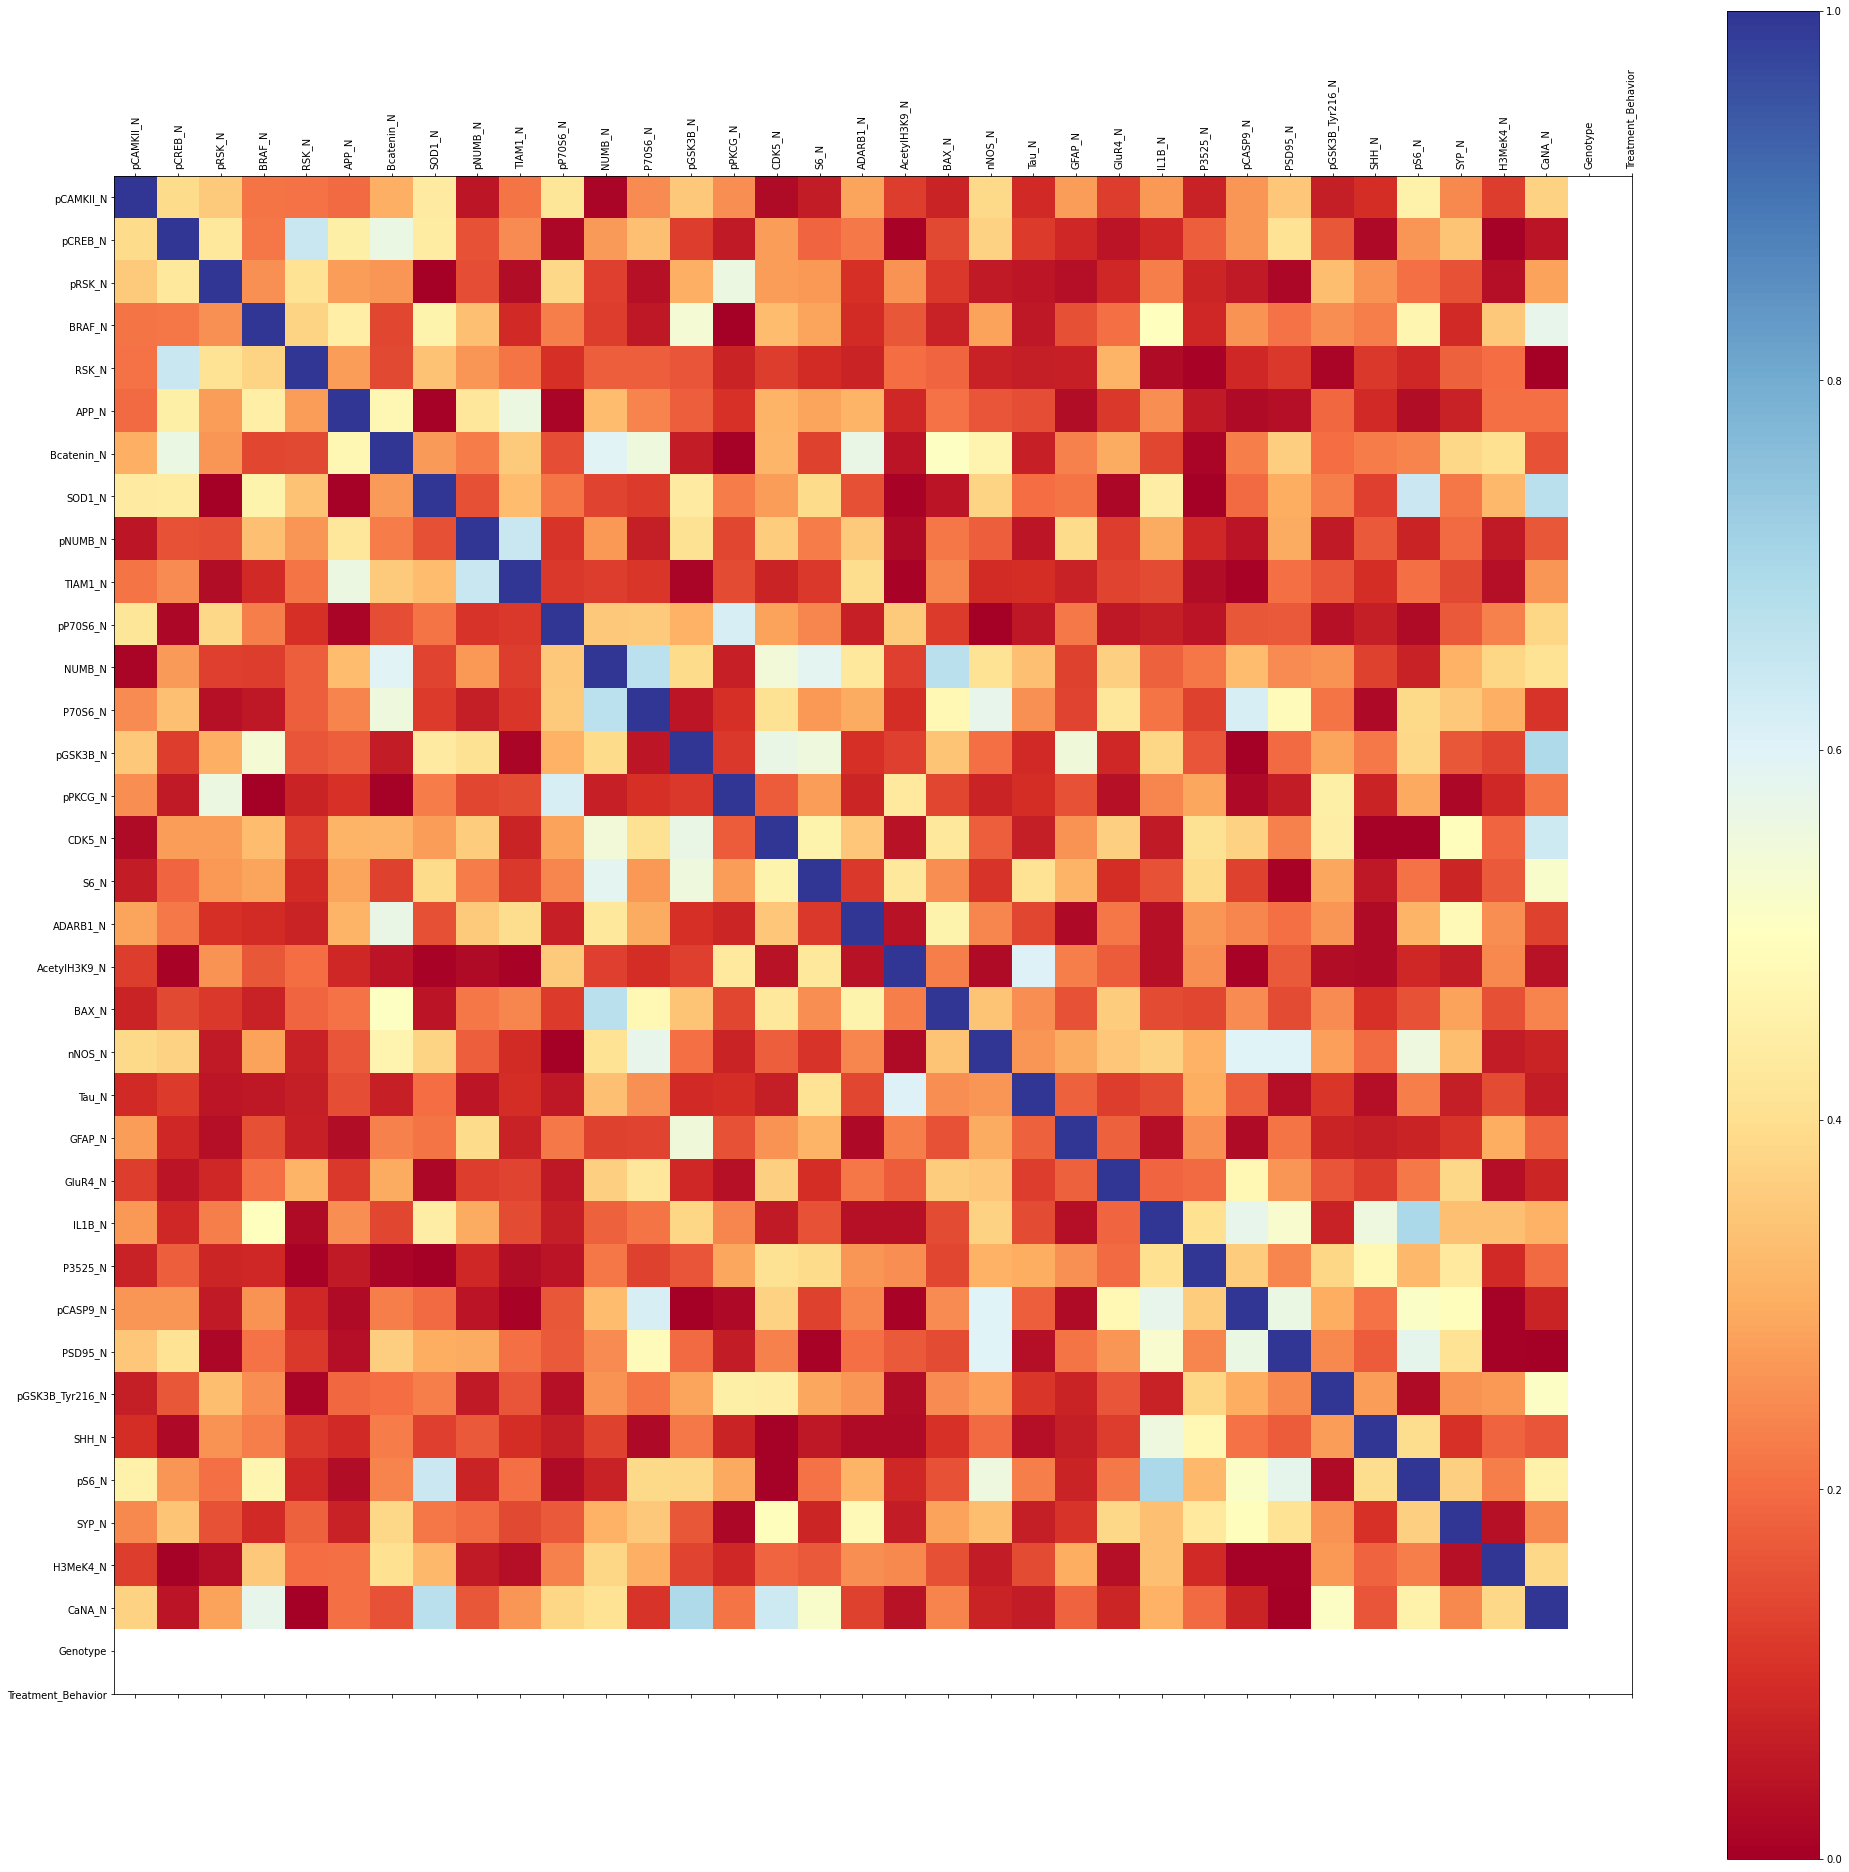

,pCAMKII_N,pCREB_N,pRSK_N,BRAF_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,pNUMB_N,TIAM1_N,...,IL1B_N,P3525_N,pCASP9_N,PSD95_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,H3MeK4_N,CaNA_N
pCAMKII_N,1.000000,0.391341,0.359334,-0.213516,0.209409,0.195638,0.307024,0.434729,0.048632,0.213756,...,0.267026,0.071983,0.264106,0.350544,0.064614,0.097052,0.456406,0.243249,0.122341,-0.372671
pCREB_N,0.391341,1.000000,0.426048,0.215537,0.642083,0.452497,0.565351,0.440104,0.158668,0.246414,...,0.083426,0.177466,0.261919,0.410553,0.165692,-0.020767,0.265358,0.347628,-0.004704,0.044146
pRSK_N,0.359334,0.426048,1.000000,0.254390,0.413988,0.276373,0.265076,-0.003366,0.149457,0.028574,...,-0.229668,0.080057,0.055374,0.017445,0.333457,-0.260085,-0.205936,0.159159,-0.034357,0.284723
BRAF_N,-0.213516,0.215537,0.254390,1.000000,0.377881,0.448723,0.138189,-0.461709,0.339638,0.087918,...,-0.497837,-0.084304,-0.259658,-0.210903,0.252876,-0.227077,-0.470725,-0.086067,-0.352472,0.577814
RSK_N,0.209409,0.642083,0.413988,0.377881,1.000000,0.275106,0.143077,0.341186,0.263100,0.213902,...,-0.023589,0.010377,-0.085897,0.115731,0.011743,-0.115182,0.083456,0.179973,0.201640,0.000625
APP_N,0.195638,0.452497,0.276373,0.448723,0.275106,1.000000,0.473187,0.005433,0.421882,0.560095,...,-0.250554,0.055028,0.024072,0.031392,0.191517,-0.089610,-0.030580,0.072421,-0.205827,0.203430
Bcatenin_N,0.307024,0.565351,0.265076,0.138189,0.143077,0.473187,1.000000,0.271642,0.224205,0.357911,...,-0.138704,-0.012901,0.229017,0.366975,0.200039,-0.223461,0.237405,0.386675,-0.404736,0.157230
SOD1_N,0.434729,0.440104,-0.003366,-0.461709,0.341186,0.005433,0.271642,1.000000,-0.153317,0.328402,...,0.445094,0.003792,0.198086,0.304002,-0.227502,0.127332,0.640441,0.218519,0.320313,-0.669271
pNUMB_N,0.048632,0.158668,0.149457,0.339638,0.263100,0.421882,0.224205,-0.153317,1.000000,0.643760,...,-0.299907,0.085612,-0.044616,-0.300140,-0.058527,-0.171856,-0.075989,0.197170,-0.056958,0.165851
TIAM1_N,0.213756,0.246414,0.028574,0.087918,0.213902,0.560095,0.357911,0.328402,0.643760,1.000000,...,-0.147509,0.028944,0.009297,-0.204789,-0.162755,-0.096421,0.205395,0.141037,0.031657,-0.262870


In [ ]:
#visualizing correlation after drop
Feature_eli_corr = correlation(Feature_eli_data)
Feature_eli_corr

In [ ]:
#preapring data without classes
Class_data = Feature_eli_data.copy()
Class_data = Class_data.select_dtypes(include= 'float64').copy()
Class_data

,pCAMKII_N,pCREB_N,pRSK_N,BRAF_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,pNUMB_N,TIAM1_N,...,IL1B_N,P3525_N,pCASP9_N,PSD95_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,H3MeK4_N,CaNA_N
0,2.373744,0.232224,0.441599,0.416289,0.165846,0.453910,3.037621,0.369510,0.394721,0.482864,...,0.430957,0.247538,1.603310,2.014875,0.831557,0.188852,0.106305,0.427099,0.128186,1.675652
1,2.292150,0.226972,0.445222,0.400364,0.157194,0.430940,2.921882,0.342279,0.368255,0.454519,...,0.457156,0.257632,1.671738,2.004605,0.849270,0.200404,0.106592,0.441581,0.131119,1.743610
2,2.283337,0.230247,0.467668,0.399847,0.160895,0.423187,2.944136,0.343696,0.363880,0.447197,...,0.510472,0.255343,1.663550,2.016831,0.846709,0.193685,0.108303,0.435777,0.127431,1.926427
3,2.152301,0.207004,0.477671,0.385639,0.162210,0.410615,2.500204,0.344509,0.366771,0.442650,...,0.430996,0.251103,1.484624,1.957233,0.833277,0.192112,0.103184,0.391691,0.146901,1.700563
4,2.134014,0.192158,0.483416,0.367531,0.154827,0.398550,2.456560,0.329126,0.351551,0.419095,...,0.481227,0.251773,1.534835,2.009109,0.878668,0.205604,0.104784,0.434154,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,3.208804,0.221809,0.499929,0.338002,0.170787,0.411033,2.107475,0.599971,0.340146,0.409175,...,0.498420,0.311337,1.622850,2.236925,1.001404,0.216128,0.119428,0.441207,0.190681,1.474465
758,3.384350,0.231899,0.536801,0.350772,0.179883,0.440714,2.178384,0.620297,0.377005,0.431420,...,0.532683,0.315762,1.657617,2.274556,1.043402,0.209717,0.118081,0.444913,0.197944,1.516605
759,3.006364,0.223455,0.510545,0.352364,0.188000,0.416909,1.926545,0.586545,0.364545,0.438909,...,0.474109,0.308615,1.504094,2.107139,0.948795,0.211279,0.116134,0.422789,0.191212,1.433514
760,2.948221,0.217506,0.490490,0.350123,0.182106,0.410004,1.900317,0.568686,0.346953,0.414406,...,0.528104,0.327140,1.568203,2.212959,0.995884,0.197436,0.120649,0.459901,0.213899,1.543274


In [ ]:
#standardizing (normalize) the data
from sklearn import preprocessing
scale = preprocessing.StandardScaler()
scale.fit(Class_data)
Class_i = pd.DataFrame(scale.transform(Class_data))

display(Class_i)


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.898820,0.648744,-0.010072,0.106532,-0.139642,0.905988,2.101361,-0.568891,0.596277,1.073032,...,-1.146591,-1.380069,0.281954,-0.887186,-0.158189,-1.269701,-1.058433,-0.371984,-1.458136,0.943046
1,-0.963191,0.479587,0.046262,0.040462,-0.449355,0.504819,1.827773,-0.677842,0.165981,0.614182,...,-0.840216,-1.045982,0.557972,-0.926013,0.025901,-0.878703,-1.039198,-0.139388,-1.400751,1.144768
2,-0.970144,0.585066,0.395320,0.038316,-0.316849,0.369411,1.880378,-0.672173,0.094857,0.495650,...,-0.216721,-1.121745,0.524945,-0.879791,-0.000721,-1.106122,-0.924510,-0.232612,-1.472897,1.687436
3,-1.073520,-0.163587,0.550874,-0.020632,-0.269796,0.149830,0.830985,-0.668919,0.141857,0.422032,...,-1.146142,-1.262071,-0.196792,-1.105121,-0.140312,-1.159352,-1.267675,-0.940673,-1.091977,1.016991
4,-1.087947,-0.641792,0.640222,-0.095760,-0.534048,-0.060892,0.727817,-0.730470,-0.105587,0.040722,...,-0.558730,-1.239898,0.005746,-0.908986,0.331411,-0.702678,-1.160421,-0.258680,-1.063044,1.430089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.240028,0.313292,0.897007,-0.218269,0.037238,0.157137,-0.097369,0.353207,-0.291012,-0.119859,...,-0.357659,0.731460,0.360773,-0.047640,1.606940,-0.346465,-0.178772,-0.145392,-0.235447,0.345848
758,-0.101537,0.638293,1.470413,-0.165288,0.362813,0.675512,0.070250,0.434531,0.308245,0.240236,...,0.043019,0.877892,0.501014,0.094639,2.043400,-0.563470,-0.269046,-0.085877,-0.093346,0.470936
759,-0.399737,0.366285,1.062111,-0.158685,0.653356,0.259760,-0.525060,0.299489,0.105678,0.361479,...,-0.641963,0.641359,-0.118256,-0.538346,1.060202,-0.510605,-0.399556,-0.441216,-0.225055,0.224291
760,-0.445606,0.174685,0.750222,-0.167979,0.442395,0.139152,-0.587060,0.228032,-0.180338,-0.035177,...,-0.010527,1.254477,0.140343,-0.138255,1.549577,-0.979130,-0.096908,0.154848,0.218809,0.550098


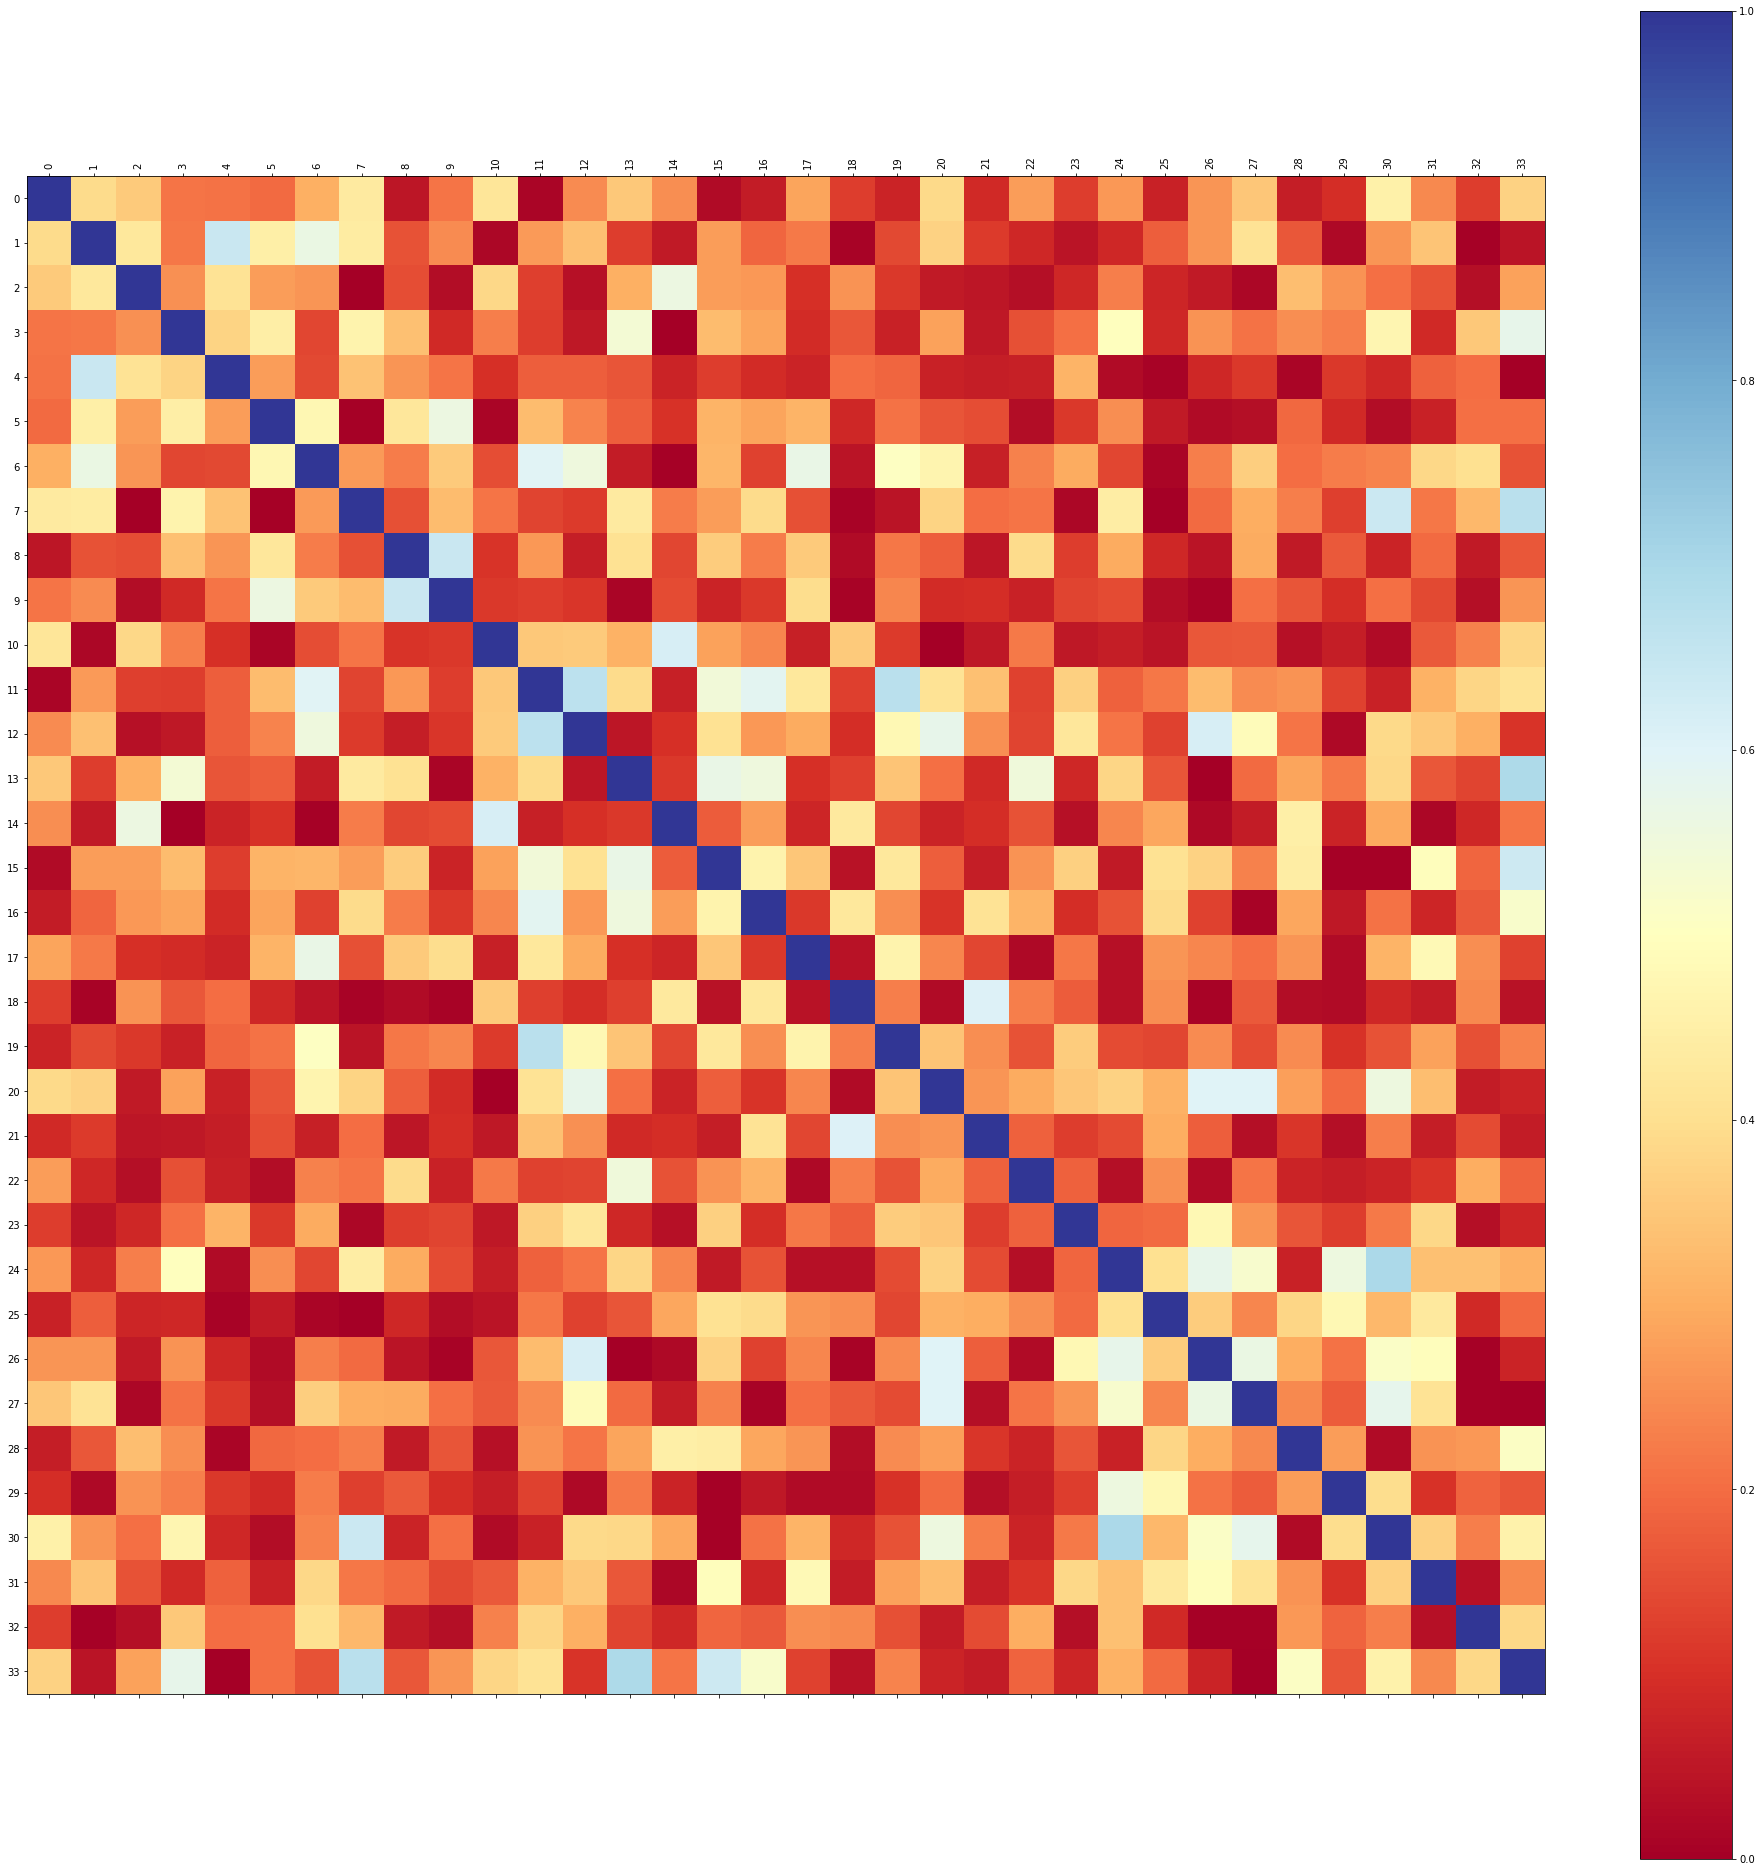

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.000000,0.391341,0.359334,-0.213516,0.209409,0.195638,0.307024,0.434729,0.048632,0.213756,...,0.267026,0.071983,0.264106,0.350544,0.064614,0.097052,0.456406,0.243249,0.122341,-0.372671
1,0.391341,1.000000,0.426048,0.215537,0.642083,0.452497,0.565351,0.440104,0.158668,0.246414,...,0.083426,0.177466,0.261919,0.410553,0.165692,-0.020767,0.265358,0.347628,-0.004704,0.044146
2,0.359334,0.426048,1.000000,0.254390,0.413988,0.276373,0.265076,-0.003366,0.149457,0.028574,...,-0.229668,0.080057,0.055374,0.017445,0.333457,-0.260085,-0.205936,0.159159,-0.034357,0.284723
3,-0.213516,0.215537,0.254390,1.000000,0.377881,0.448723,0.138189,-0.461709,0.339638,0.087918,...,-0.497837,-0.084304,-0.259658,-0.210903,0.252876,-0.227077,-0.470725,-0.086067,-0.352472,0.577814
4,0.209409,0.642083,0.413988,0.377881,1.000000,0.275106,0.143077,0.341186,0.263100,0.213902,...,-0.023589,0.010377,-0.085897,0.115731,0.011743,-0.115182,0.083456,0.179973,0.201640,0.000625
5,0.195638,0.452497,0.276373,0.448723,0.275106,1.000000,0.473187,0.005433,0.421882,0.560095,...,-0.250554,0.055028,0.024072,0.031392,0.191517,-0.089610,-0.030580,0.072421,-0.205827,0.203430
6,0.307024,0.565351,0.265076,0.138189,0.143077,0.473187,1.000000,0.271642,0.224205,0.357911,...,-0.138704,-0.012901,0.229017,0.366975,0.200039,-0.223461,0.237405,0.386675,-0.404736,0.157230
7,0.434729,0.440104,-0.003366,-0.461709,0.341186,0.005433,0.271642,1.000000,-0.153317,0.328402,...,0.445094,0.003792,0.198086,0.304002,-0.227502,0.127332,0.640441,0.218519,0.320313,-0.669271
8,0.048632,0.158668,0.149457,0.339638,0.263100,0.421882,0.224205,-0.153317,1.000000,0.643760,...,-0.299907,0.085612,-0.044616,-0.300140,-0.058527,-0.171856,-0.075989,0.197170,-0.056958,0.165851
9,0.213756,0.246414,0.028574,0.087918,0.213902,0.560095,0.357911,0.328402,0.643760,1.000000,...,-0.147509,0.028944,0.009297,-0.204789,-0.162755,-0.096421,0.205395,0.141037,0.031657,-0.262870


In [ ]:
#visualizing correlation after normalization
nor_correlation = correlation(Class_i)
nor_correlation

# **Binary Classification**

In [ ]:
#preapring the class daat for binary class
Class_b = Feature_eli_data.copy()
Class_b['Genotype'] = np.where(Class_b['Genotype']== 'Control' ,0,1)
Class_b

,pCAMKII_N,pCREB_N,pRSK_N,BRAF_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,pNUMB_N,TIAM1_N,...,pCASP9_N,PSD95_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,2.373744,0.232224,0.441599,0.416289,0.165846,0.453910,3.037621,0.369510,0.394721,0.482864,...,1.603310,2.014875,0.831557,0.188852,0.106305,0.427099,0.128186,1.675652,0,Memantine_C/S
1,2.292150,0.226972,0.445222,0.400364,0.157194,0.430940,2.921882,0.342279,0.368255,0.454519,...,1.671738,2.004605,0.849270,0.200404,0.106592,0.441581,0.131119,1.743610,0,Memantine_C/S
2,2.283337,0.230247,0.467668,0.399847,0.160895,0.423187,2.944136,0.343696,0.363880,0.447197,...,1.663550,2.016831,0.846709,0.193685,0.108303,0.435777,0.127431,1.926427,0,Memantine_C/S
3,2.152301,0.207004,0.477671,0.385639,0.162210,0.410615,2.500204,0.344509,0.366771,0.442650,...,1.484624,1.957233,0.833277,0.192112,0.103184,0.391691,0.146901,1.700563,0,Memantine_C/S
4,2.134014,0.192158,0.483416,0.367531,0.154827,0.398550,2.456560,0.329126,0.351551,0.419095,...,1.534835,2.009109,0.878668,0.205604,0.104784,0.434154,0.148380,1.839730,0,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,3.208804,0.221809,0.499929,0.338002,0.170787,0.411033,2.107475,0.599971,0.340146,0.409175,...,1.622850,2.236925,1.001404,0.216128,0.119428,0.441207,0.190681,1.474465,1,Saline_S/C
758,3.384350,0.231899,0.536801,0.350772,0.179883,0.440714,2.178384,0.620297,0.377005,0.431420,...,1.657617,2.274556,1.043402,0.209717,0.118081,0.444913,0.197944,1.516605,1,Saline_S/C
759,3.006364,0.223455,0.510545,0.352364,0.188000,0.416909,1.926545,0.586545,0.364545,0.438909,...,1.504094,2.107139,0.948795,0.211279,0.116134,0.422789,0.191212,1.433514,1,Saline_S/C
760,2.948221,0.217506,0.490490,0.350123,0.182106,0.410004,1.900317,0.568686,0.346953,0.414406,...,1.568203,2.212959,0.995884,0.197436,0.120649,0.459901,0.213899,1.543274,1,Saline_S/C


In [ ]:
ByClass = pd.DataFrame(Class_b['Genotype'])

In [ ]:

print(ByClass)


     Genotype
0           0
1           0
2           0
3           0
4           0
..        ...
757         1
758         1
759         1
760         1
761         1

[762 rows x 1 columns]


In [ ]:
#Splitting the data into train and validation data
from sklearn.model_selection import train_test_split
x_train_bi, x_test_bi, y_train_bi, y_test_bi = train_test_split(Class_i, ByClass, train_size = 0.67, random_state = 99)

In [ ]:
x_train_bi.info()
len(x_train_bi)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 420 to 641
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       510 non-null    float64
 1   1       510 non-null    float64
 2   2       510 non-null    float64
 3   3       510 non-null    float64
 4   4       510 non-null    float64
 5   5       510 non-null    float64
 6   6       510 non-null    float64
 7   7       510 non-null    float64
 8   8       510 non-null    float64
 9   9       510 non-null    float64
 10  10      510 non-null    float64
 11  11      510 non-null    float64
 12  12      510 non-null    float64
 13  13      510 non-null    float64
 14  14      510 non-null    float64
 15  15      510 non-null    float64
 16  16      510 non-null    float64
 17  17      510 non-null    float64
 18  18      510 non-null    float64
 19  19      510 non-null    float64
 20  20      510 non-null    float64
 21  21      510 non-null    float64
 22  

510

In [ ]:
x_test_bi.info()
len(x_test_bi)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 204 to 253
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       252 non-null    float64
 1   1       252 non-null    float64
 2   2       252 non-null    float64
 3   3       252 non-null    float64
 4   4       252 non-null    float64
 5   5       252 non-null    float64
 6   6       252 non-null    float64
 7   7       252 non-null    float64
 8   8       252 non-null    float64
 9   9       252 non-null    float64
 10  10      252 non-null    float64
 11  11      252 non-null    float64
 12  12      252 non-null    float64
 13  13      252 non-null    float64
 14  14      252 non-null    float64
 15  15      252 non-null    float64
 16  16      252 non-null    float64
 17  17      252 non-null    float64
 18  18      252 non-null    float64
 19  19      252 non-null    float64
 20  20      252 non-null    float64
 21  21      252 non-null    float64
 22  

252

In [ ]:
y_train_bi.info()
len(y_train_bi)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 420 to 641
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Genotype  510 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


510

In [ ]:
y_test_bi.info()
len(y_test_bi)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 204 to 253
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Genotype  252 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


252

Using some classifiers determining best metrices to choose

In [ ]:
#elasticnet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import classification_report
from sklearn.metrics  import balanced_accuracy_score
from sklearn.metrics  import recall_score
from sklearn.metrics  import f1_score, accuracy_score
from sklearn.metrics  import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix
from sklearn.metrics  import ConfusionMatrixDisplay
enc = LogisticRegression(penalty= 'elasticnet', solver= 'saga', max_iter= 1000)
hyperparameters =  {'l1_ratio': [.1, .5, .7, .9, .95, .99]} 
kfold = 5
classifier = GridSearchCV(enc, param_grid = hyperparameters, cv = kfold)
classifier.fit(np.array(x_train_bi), np.squeeze(y_train_bi))
#estimate = classifier.fit(np.array(x_train_bi), np.squeeze(y_train_bi))
print ('Best parameter ')
print(classifier.best_params_)

print('Validation classification report: ')
y_true, y_pred = np.squeeze(y_test_bi), classifier.predict(x_test_bi)
print(classification_report(y_true, y_pred))

print('Best f1 score: ' + str(classifier.best_score_))
print("validation_accuracy_score: " + str(accuracy_score(y_true, y_pred)))
print("validation_balanced_accuracy_score: " + str(balanced_accuracy_score(y_true, y_pred)))
print("validation_recall_score: " + str(recall_score(y_true, y_pred)))
print("validation_AUC-ROC: " + str(roc_auc_score(y_true, y_pred)))




Best parameter 
{'l1_ratio': 0.9}
Validation classification report: 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       139
           1       0.93      0.83      0.88       113

    accuracy                           0.90       252
   macro avg       0.90      0.89      0.89       252
weighted avg       0.90      0.90      0.90       252

Best f1 score: 0.9215686274509804
validation_accuracy_score: 0.8968253968253969
validation_balanced_accuracy_score: 0.890749347424715
validation_recall_score: 0.831858407079646
validation_AUC-ROC: 0.8907493474247151


In [ ]:
#SVM
from sklearn import svm
from sklearn.svm import SVC

hyperparameters = {'kernel': ('rbf', 'linear', 'poly'), 'C':[0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 5, 8]}

svc = svm.SVC()
classifier = GridSearchCV(svc,  hyperparameters, scoring = 'f1',  )
classifier.fit(np.array(x_train_bi), np.squeeze(y_train_bi))
print ('Best parameter ')
print(classifier.best_params_)

print('Validation classification report: ')

y_true, y_pred = np.squeeze(y_test_bi), classifier.predict(x_test_bi)
print(classification_report(y_true, y_pred))
print('Best f1 score: ' + str(classifier.best_score_))
print("validation_accuracy_score: " + str(accuracy_score(y_true, y_pred)))
print("validation_balanced_accuracy_score: " + str(balanced_accuracy_score(y_true, y_pred)))
print("validation_recall_score: " + str(recall_score(y_true, y_pred)))
print("validation_AUC-ROC: " + str(roc_auc_score(y_true, y_pred)))

Best parameter 
{'C': 10, 'degree': 1, 'kernel': 'rbf'}
Validation classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       139
           1       1.00      0.97      0.99       113

    accuracy                           0.99       252
   macro avg       0.99      0.99      0.99       252
weighted avg       0.99      0.99      0.99       252

Best f1 score: 0.9954022988505746
validation_accuracy_score: 0.9880952380952381
validation_balanced_accuracy_score: 0.9867256637168141
validation_recall_score: 0.9734513274336283
validation_AUC-ROC: 0.9867256637168141


it seems f1 score and recall score doing abetter job

In [ ]:
#function cross validation and determing best parameters for the each given classifier.
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

def Bi_Model_Metrics(input, output, model, hyperparameters, kfold, split_size):
  from sklearn.model_selection import train_test_split
  from sklearn.model_selection import GridSearchCV
  from sklearn.metrics  import classification_report
  from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer, balanced_accuracy_score

  k_fold = KFold(n_splits = kfold)

  x_train, x_test, y_train, y_test = train_test_split(input, output, train_size = split_size, random_state = 99)
  classifier = GridSearchCV(model, param_grid = hyperparameters, scoring = 'f1', cv = k_fold) #grid search that will test all the parameters and return the best one
  classifier.fit(np.array(x_train), np.squeeze(y_train))

  print ('Best parameter ')
  print(classifier.best_params_)

  print('Validation classification report: ')
  y_true, y_pred = np.squeeze(y_test), classifier.predict(x_test)
  print(classification_report(y_true, y_pred))
  print('Best f1 score:  ' + str(classifier.best_score_))
  #print("validation_recall_score: " + str(recall_score(y_true, y_pred)))
  #print("validation_accuracy_score: " + str(accuracy_score(y_true, y_pred)))
  #print("validation_balanced_accuracy_score: " + str(balanced_accuracy_score(y_true, y_pred)))
  #print("validation_AUC-ROC: " + str(roc_auc_score(y_true, y_pred)))

In [ ]:
#ElasticNet
enc = LogisticRegression(penalty= 'elasticnet', solver= 'saga', max_iter= 1000)
hyperparameters_enc =  {'l1_ratio': [.1, .9, .95, .99]} 
Bi_Model_Metrics(Class_i, ByClass, enc, hyperparameters_enc, 5, 0.67)

Best parameter 
{'l1_ratio': 0.95}
Validation classification report: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       139
           1       0.92      0.83      0.87       113

    accuracy                           0.89       252
   macro avg       0.90      0.89      0.89       252
weighted avg       0.89      0.89      0.89       252

Best f1 score:  0.8888668274474727


ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression

In [ ]:
#neural netwrok (single hidden layer ReLu)
from sklearn.neural_network import MLPClassifier
nn_relu = MLPClassifier(activation = 'relu', max_iter = 10000)
hyperparameters_relu = {'hidden_layer_sizes': [1, 10, 100], 'alpha': [ 0.001, 0.01, 0.1, 1] }
Bi_Model_Metrics(Class_i, ByClass, nn_relu, hyperparameters_relu, 5, 0.67)

Best parameter 
{'alpha': 0.1, 'hidden_layer_sizes': 100}
Validation classification report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       139
           1       0.99      0.96      0.97       113

    accuracy                           0.98       252
   macro avg       0.98      0.97      0.98       252
weighted avg       0.98      0.98      0.98       252

Best f1 score:  0.9851617073766004


ref: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [ ]:
#neural netwrok (single hidden layer Softmax)
nn_soft = MLPClassifier( max_iter = 10000)
nn_soft.out_activation_ = 'softmax'
hyperparameters_soft = {'hidden_layer_sizes': [1, 10, 100],  'alpha': [0.001, 0.01, 0.1, 1]  }
Bi_Model_Metrics(Class_i, ByClass, nn_soft, hyperparameters_soft, 5, 0.67)

Best parameter 
{'alpha': 0.001, 'hidden_layer_sizes': 100}
Validation classification report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       139
           1       1.00      0.96      0.98       113

    accuracy                           0.98       252
   macro avg       0.99      0.98      0.98       252
weighted avg       0.98      0.98      0.98       252

Best f1 score:  0.9804752387297357


ref: https://stats.stackexchange.com/questions/243588/how-to-apply-softmax-as-activation-function-in-multi-layer-perceptron-in-scikit

In [ ]:
#SVM
svc = svm.SVC()
hyperparameters_svm = {'kernel': ('rbf', 'linear', 'poly'), 'C':[0.01, 0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}

Bi_Model_Metrics(Class_i, ByClass, svc, hyperparameters_svm, 5, 0.67)

Best parameter 
{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Validation classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       139
           1       1.00      0.99      1.00       113

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

Best f1 score:  0.9921394395078605


ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
#RandomForrest
rfc = RandomForestClassifier()
hyperparameters_rfc = { 'n_estimators': [5, 8, 9, 10, 12, 15], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2']} 
Bi_Model_Metrics(Class_i, ByClass, rfc, hyperparameters_rfc, 5, 0.67)

Best parameter 
{'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}
Validation classification report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       139
           1       0.96      0.93      0.95       113

    accuracy                           0.95       252
   macro avg       0.95      0.95      0.95       252
weighted avg       0.95      0.95      0.95       252

Best f1 score:  0.952319514951671


ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
,
 https://analyticsindiamag.com/guide-to-hyperparameters-tuning-using-gridsearchcv-and-randomizedsearchcv/

# **Four class Multi Classification**

In [ ]:
#preapring the class data as binary one hot encoding for multiclass
ClassM = Feature_eli_data.copy()
multi_op = pd.DataFrame(ClassM['Treatment_Behavior'].unique()).T
header_row = 0
multi_op.columns = multi_op.iloc[header_row]
multi_op = multi_op.drop(header_row)
multi_op

,Memantine_C/S,Memantine_S/C,Saline_C/S,Saline_S/C


Ref: 
https://www.adamsmith.haus/python/answers/how-to-convert-a-pandas-dataframe-row-to-column-headers-in-python

In [ ]:
for label in ClassM['Treatment_Behavior'].unique():
  multi_op[label] = np.where(ClassM['Treatment_Behavior'] == label,1,0)
multi_op

,Memantine_C/S,Memantine_S/C,Saline_C/S,Saline_S/C
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
757,0,0,0,1
758,0,0,0,1
759,0,0,0,1
760,0,0,0,1


Ref:
https://www.analyticsvidhya.com/blog/2021/05/how-to-perform-one-hot-encoding-for-multi-categorical-variables/

In [ ]:
MultiClass = pd.DataFrame(multi_op)
MultiClass


,Memantine_C/S,Memantine_S/C,Saline_C/S,Saline_S/C
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
757,0,0,0,1
758,0,0,0,1
759,0,0,0,1
760,0,0,0,1


In [ ]:
#preapring the label data to multiclass as integers (some classifiers are not work well with binary)
Class_m = pd.DataFrame(Feature_eli_data["Treatment_Behavior"])
label_to_class =  {"Memantine_C/S": 0, "Memantine_S/C": 1, "Saline_C/S": 2, "Saline_S/C": 3,}
Class_m = Class_m.replace(label_to_class)
Class_m

,Treatment_Behavior
0,0
1,0
2,0
3,0
4,0
...,...
757,3
758,3
759,3
760,3


In [ ]:
MultiLabel = Class_m.copy()

In [ ]:
from sklearn.model_selection import train_test_split
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(Class_i, MultiClass, train_size = 0.67, random_state = 99)

In [ ]:
x_train_multi.info()
len(x_train_multi)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 420 to 641
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       510 non-null    float64
 1   1       510 non-null    float64
 2   2       510 non-null    float64
 3   3       510 non-null    float64
 4   4       510 non-null    float64
 5   5       510 non-null    float64
 6   6       510 non-null    float64
 7   7       510 non-null    float64
 8   8       510 non-null    float64
 9   9       510 non-null    float64
 10  10      510 non-null    float64
 11  11      510 non-null    float64
 12  12      510 non-null    float64
 13  13      510 non-null    float64
 14  14      510 non-null    float64
 15  15      510 non-null    float64
 16  16      510 non-null    float64
 17  17      510 non-null    float64
 18  18      510 non-null    float64
 19  19      510 non-null    float64
 20  20      510 non-null    float64
 21  21      510 non-null    float64
 22  

510

In [ ]:
y_train_multi.info()
len(y_train_multi)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 420 to 641
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Memantine_C/S  510 non-null    int64
 1   Memantine_S/C  510 non-null    int64
 2   Saline_C/S     510 non-null    int64
 3   Saline_S/C     510 non-null    int64
dtypes: int64(4)
memory usage: 19.9 KB


510

In [ ]:
x_test_multi.info()
len(x_test_multi)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 204 to 253
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       252 non-null    float64
 1   1       252 non-null    float64
 2   2       252 non-null    float64
 3   3       252 non-null    float64
 4   4       252 non-null    float64
 5   5       252 non-null    float64
 6   6       252 non-null    float64
 7   7       252 non-null    float64
 8   8       252 non-null    float64
 9   9       252 non-null    float64
 10  10      252 non-null    float64
 11  11      252 non-null    float64
 12  12      252 non-null    float64
 13  13      252 non-null    float64
 14  14      252 non-null    float64
 15  15      252 non-null    float64
 16  16      252 non-null    float64
 17  17      252 non-null    float64
 18  18      252 non-null    float64
 19  19      252 non-null    float64
 20  20      252 non-null    float64
 21  21      252 non-null    float64
 22  

252

In [ ]:
y_test_multi.info()
len(y_test_multi)
y_test_multi.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 204 to 253
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Memantine_C/S  252 non-null    int64
 1   Memantine_S/C  252 non-null    int64
 2   Saline_C/S     252 non-null    int64
 3   Saline_S/C     252 non-null    int64
dtypes: int64(4)
memory usage: 9.8 KB


,Memantine_C/S,Memantine_S/C,Saline_C/S,Saline_S/C
204,0,1,0,0
386,0,0,0,1
115,1,0,0,0
140,0,1,0,0
553,0,1,0,0
568,0,1,0,0
84,1,0,0,0
22,1,0,0,0
138,0,1,0,0
30,1,0,0,0


In [ ]:
x_train_mult, x_test_mult, y_train_mult, y_test_mult = train_test_split(Class_i, MultiLabel, train_size = 0.67, random_state = 99)

In [ ]:
y_train_mult

,Treatment_Behavior
420,3
442,0
362,3
466,0
398,3
...,...
713,2
168,1
185,1
35,0


Tesing some classifiers for multi class

In [ ]:
#SVM
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer


svc = svm.SVC()
hyperparameters = {'kernel': ('rbf','linear', 'poly'), 'C':[0.01, 0.1, 1], 'degree': [2, 5, 8, 12]}
#hyperparameters = {'estimator__kernel': ('rbf', 'linear', 'poly'), 'estimator__C':[0.01, 0.1, 1, 10, 100], 'estimator__degree': [1, 2, 3, 5, 8]}
#svc = OneVsOneClassifier(svm.SVC())
#my_scorer = make_scorer(f1_score, greater_is_better=True, average='weighted')

classifier = GridSearchCV(svc,  hyperparameters )
classifier.fit(np.array(x_train_mult), np.squeeze(y_train_mult))
print ('Best parameter ')
print(classifier.best_params_)
print('Test classification report:')
y_true, y_pred = np. squeeze (y_test_mult), classifier.predict (np.array(x_test_mult)) 
print(classification_report (y_true, y_pred, zero_division = 1))

print('Best f1 score:  ' + str(classifier.best_score_))
print("validation_recall_score: " + str(recall_score(y_true, y_pred, average='weighted')))
print("validation_accuracy_score: " + str(accuracy_score(y_true, y_pred)))
print("validation_balanced_accuracy_score: " + str(balanced_accuracy_score(y_true, y_pred)))




Best parameter 
{'C': 1, 'degree': 2, 'kernel': 'rbf'}
Test classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        42

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

Best f1 score:  0.9901960784313726
validation_recall_score: 1.0
validation_accuracy_score: 1.0
validation_balanced_accuracy_score: 1.0


In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
hyperparameters = { 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2']} 

classifier = GridSearchCV(rfc, param_grid = hyperparameters)

classifier.fit (np.array(x_train_multi), np.squeeze (y_train_multi))
print('Best parameters:')
print(classifier.best_params_)


print('Test classification report:')
y_true, y_pred = np. squeeze (y_test_multi), classifier.predict (np.array(x_test_multi)) 
print(classification_report (y_true, y_pred, zero_division = 1))
print('Best f1 score:  ' + str(classifier.best_score_))
print("validation_recall_score: " + str(recall_score(y_true, y_pred, average='weighted')))
print("validation_accuracy_score: " + str(accuracy_score(y_true, y_pred)))




Best parameters:
{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 13}
Test classification report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        75
           1       1.00      0.99      0.99        79
           2       0.90      1.00      0.95        56
           3       0.98      0.98      0.98        42

   micro avg       0.97      0.95      0.96       252
   macro avg       0.97      0.95      0.96       252
weighted avg       0.97      0.95      0.96       252
 samples avg       0.97      0.95      0.95       252

Best f1 score:  0.9450980392156862
validation_recall_score: 0.9484126984126984
validation_accuracy_score: 0.9484126984126984


ref: https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi

In [ ]:
#function for multi class classification
def Multi_Model_Metrics(input, output, model, hyperparameters, kfold, split_size):
  from sklearn.model_selection import train_test_split
  from sklearn.model_selection import GridSearchCV
  from sklearn.metrics  import classification_report
  from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer, balanced_accuracy_score
  from sklearn.linear_model import LogisticRegression
  from sklearn.neural_network import MLPClassifier
  from sklearn import svm
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import KFold

  k_fold = KFold(n_splits = kfold)

  x_train, x_test, y_train, y_test = train_test_split(input, output, train_size = split_size, random_state = 99)
  classifier = GridSearchCV(model, param_grid = hyperparameters, cv = k_fold)
  classifier.fit(np.array(x_train), np.squeeze(y_train))

  print ('Best parameter ')
  print(classifier.best_params_)

  print('Validation classification report: ')
  y_true, y_pred = np.squeeze(y_test), classifier.predict(x_test)
  print(classification_report(y_true, y_pred, zero_division = 1))
  print('Best f1 score:  ' + str(classifier.best_score_))
  #print("validation_recall_score: " + str(recall_score(y_true, y_pred, average='weighted')))
  #print("validation_accuracy_score: " + str(accuracy_score(y_true, y_pred)))
  #print("validation_balanced_accuracy_score: " + str(balanced_accuracy_score(y_true, y_pred)))
  #print("validation_AUC-ROC: " + str(roc_auc_score(y_true, y_pred)))

In [ ]:
#elastic net
enc = LogisticRegression(penalty= 'elasticnet', solver= 'saga', max_iter= 1000)
hyperparameters_enc =  {'l1_ratio': [.1, .5, .9, .95, .99]} 
Multi_Model_Metrics(Class_i, MultiLabel, enc, hyperparameters_enc, 5, 0.67)

Best parameter 
{'l1_ratio': 0.1}
Validation classification report: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        75
           1       1.00      1.00      1.00        79
           2       0.88      0.89      0.88        56
           3       1.00      0.98      0.99        42

    accuracy                           0.95       252
   macro avg       0.95      0.95      0.95       252
weighted avg       0.95      0.95      0.95       252

Best f1 score:  0.9529411764705882


In [ ]:
##ReLu
nn_relu = MLPClassifier(activation = 'relu', max_iter = 10000)
hyperparameters_relu = {'hidden_layer_sizes': [1, 10, 100, 100], 'alpha': [ 0.001, 0.01, 0.1, 1] }
Multi_Model_Metrics(Class_i, MultiClass, nn_relu, hyperparameters_relu, 5, 0.67)

Best parameter 
{'alpha': 0.001, 'hidden_layer_sizes': 100}
Validation classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79
           2       0.98      1.00      0.99        56
           3       1.00      0.98      0.99        42

   micro avg       1.00      1.00      1.00       252
   macro avg       1.00      0.99      0.99       252
weighted avg       1.00      1.00      1.00       252
 samples avg       1.00      1.00      0.99       252

Best f1 score:  0.9823529411764707


In [ ]:
#neural netwrok (single hidden layer Softmax)
nn_soft = MLPClassifier( max_iter = 10000)
nn_soft.out_activation_ = 'softmax'
hyperparameters_soft = {'hidden_layer_sizes': [1, 10, 100, 100],  'alpha': [0.001, 0.01, 0.1, 1]  }
Multi_Model_Metrics(Class_i, MultiClass, nn_soft, hyperparameters_soft, 5, 0.67)

Best parameter 
{'alpha': 0.01, 'hidden_layer_sizes': 100}
Validation classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79
           2       0.98      1.00      0.99        56
           3       1.00      0.98      0.99        42

   micro avg       1.00      1.00      1.00       252
   macro avg       1.00      0.99      0.99       252
weighted avg       1.00      1.00      1.00       252
 samples avg       1.00      1.00      0.99       252

Best f1 score:  0.9823529411764707


In [ ]:
#SVM
svc = svm.SVC()
hyperparameters_svm = {'kernel': ('rbf', 'linear', 'poly'), 'C':[0.01, 0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001]}

Multi_Model_Metrics(Class_i, MultiLabel, svc, hyperparameters_svm, 5, 0.67)

Best parameter 
{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Validation classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        42

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

Best f1 score:  0.9921568627450981


In [ ]:
#RandomForrest
rfc = RandomForestClassifier()
hyperparameters_rfc = { 'n_estimators': [5, 8, 9, 10,  12, 15], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2']} 
Multi_Model_Metrics(Class_i, MultiClass, rfc, hyperparameters_rfc, 5, 0.67)

Best parameter 
{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 15}
Validation classification report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        75
           1       0.99      0.99      0.99        79
           2       0.92      1.00      0.96        56
           3       0.97      0.93      0.95        42

   micro avg       0.97      0.95      0.96       252
   macro avg       0.97      0.95      0.96       252
weighted avg       0.97      0.95      0.96       252
 samples avg       0.97      0.95      0.95       252

Best f1 score:  0.9470588235294117


Feature: 0, Score: 0.01840
Feature: 1, Score: 0.01623
Feature: 2, Score: 0.01765
Feature: 3, Score: 0.03884
Feature: 4, Score: 0.02746
Feature: 5, Score: 0.16209
Feature: 6, Score: 0.02842
Feature: 7, Score: 0.02217
Feature: 8, Score: 0.03465
Feature: 9, Score: 0.01807
Feature: 10, Score: 0.02311
Feature: 11, Score: 0.01613
Feature: 12, Score: 0.00690
Feature: 13, Score: 0.02292
Feature: 14, Score: 0.04847
Feature: 15, Score: 0.02219
Feature: 16, Score: 0.05833
Feature: 17, Score: 0.04149
Feature: 18, Score: 0.05246
Feature: 19, Score: 0.01027
Feature: 20, Score: 0.02187
Feature: 21, Score: 0.04555
Feature: 22, Score: 0.02045
Feature: 23, Score: 0.01913
Feature: 24, Score: 0.01730
Feature: 25, Score: 0.02778
Feature: 26, Score: 0.02220
Feature: 27, Score: 0.01779
Feature: 28, Score: 0.01828
Feature: 29, Score: 0.00835
Feature: 30, Score: 0.02420
Feature: 31, Score: 0.04273
Feature: 32, Score: 0.01209
Feature: 33, Score: 0.01603


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


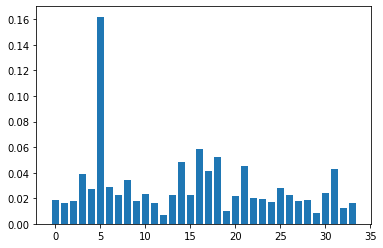

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model = RandomForestClassifier(max_depth = 10, max_features = 'auto', n_estimators = 15)
# fit the model
model.fit(Class_i, ByClass)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [ ]:
def Feature_Importance(Model, input, output):
  from sklearn.datasets import make_classification
  from sklearn.ensemble import RandomForestClassifier
  from matplotlib import pyplot


  # define the model
  model = Model #RandomForestClassifier(max_depth = 10, max_features = 'auto', n_estimators = 15)
  # fit the model
  model.fit(input, output)
  # get importance
  importance = model.feature_importances_
  # summarize feature importance
  for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
  # plot feature importance
  pyplot.bar([x for x in range(len(importance))], importance)
  pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Feature: 0, Score: 0.03857
Feature: 1, Score: 0.02419
Feature: 2, Score: 0.02360
Feature: 3, Score: 0.03260
Feature: 4, Score: 0.01733
Feature: 5, Score: 0.08467
Feature: 6, Score: 0.01271
Feature: 7, Score: 0.01895
Feature: 8, Score: 0.02537
Feature: 9, Score: 0.02069
Feature: 10, Score: 0.02773
Feature: 11, Score: 0.01375
Feature: 12, Score: 0.01080
Feature: 13, Score: 0.02918
Feature: 14, Score: 0.04117
Feature: 15, Score: 0.01919
Feature: 16, Score: 0.07928
Feature: 17, Score: 0.02689
Feature: 18, Score: 0.08336
Feature: 19, Score: 0.01602
Feature: 20, Score: 0.01108
Feature: 21, Score: 0.05730
Feature: 22, Score: 0.01792
Feature: 23, Score: 0.02776
Feature: 24, Score: 0.01630
Feature: 25, Score: 0.00806
Feature: 26, Score: 0.02910
Feature: 27, Score: 0.02350
Feature: 28, Score: 0.02033
Feature: 29, Score: 0.01598
Feature: 30, Score: 0.04153
Feature: 31, Score: 0.02713
Feature: 32, Score: 0.02237
Feature: 33, Score: 0.03561


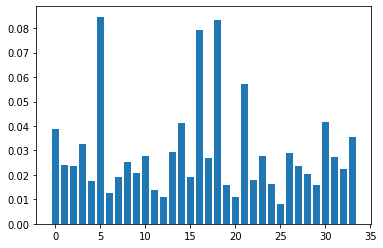

In [ ]:
Model = RandomForestClassifier(max_depth = None, n_estimators = 15)
Feature_Importance(Model, Class_i, ByClass)

In [ ]:
op_data = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")
op_data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


In [ ]:
Impute_data_op = Imputation(op_data.copy())

In [ ]:
Feature_elimi = Impute_data_op.drop(unusable_var, axis = 1)

In [ ]:
Class_op = Feature_elimi.select_dtypes(include= 'float64').copy()

In [ ]:
#standardizing (normalize) the data
from sklearn import preprocessing
scale = preprocessing.StandardScaler()
scale.fit(Class_op)
Class_o = pd.DataFrame(scale.transform(Class_op))

display(Class_o)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-1.376292,0.822835,-0.924215,1.079626,0.281870,0.822953,1.658282,-0.622188,2.237668,2.039402,...,0.462427,0.482716,0.751545,0.102244,-0.175553,-0.516397,2.198671,1.412221,-0.132331,1.208813
1,-1.332976,1.602315,-0.868393,1.180962,0.445067,1.142192,1.787491,-0.521344,2.524942,2.206403,...,0.431673,1.084179,0.647649,0.077106,-0.121121,-0.142017,2.111312,1.207686,-0.132331,1.168194
2,-1.357593,1.595749,-0.669482,1.213630,0.377659,1.098240,1.916591,-0.552539,3.042083,2.832286,...,-0.002790,0.853680,0.267803,-0.449784,-0.492996,0.037499,1.758871,0.969971,-0.132331,0.894561
3,-0.821312,0.149973,-0.746451,0.810790,0.207523,0.241537,0.874855,-0.664777,1.915409,1.246365,...,0.463602,0.068838,0.178206,0.038619,-0.053447,-0.664581,1.515133,1.686461,-0.132331,1.327924
4,-0.757459,0.423275,-0.687654,0.868412,0.471889,0.491169,1.222679,-0.616940,2.362827,1.606360,...,0.307656,0.848849,0.085218,0.060704,0.061378,-0.447700,1.571069,1.326581,-0.132331,1.247124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-0.956547,-1.124435,0.110387,-1.061852,-0.639431,-0.706087,-1.409185,0.751297,-1.518901,-1.229115,...,0.663931,0.597659,-0.889501,-0.861471,0.051741,1.798059,0.156378,-0.475503,3.247940,-0.598727
221,-0.655581,-0.581492,0.162057,-0.873496,0.118895,0.389661,-0.871188,1.088695,-1.081264,-0.818434,...,0.594961,0.178356,-0.877726,-1.253142,-0.127213,1.624208,-0.068511,-0.377369,2.177503,-0.677766
222,-1.219725,-1.200692,-0.409712,-1.076526,-0.630140,-1.142455,-1.756935,0.526119,-1.550588,-1.666271,...,0.465247,0.846407,-1.189899,-1.250784,-0.102598,2.196109,-0.156688,-0.059510,3.910067,-0.667209
223,-1.231263,-1.403294,-0.237066,-1.090005,-0.716854,-1.087331,-1.725218,0.536290,-1.728129,-1.627412,...,0.771569,0.982325,-1.101549,-1.453105,-0.128166,1.843362,0.047974,-0.540583,4.026089,-0.776149


In [ ]:
#preapring the class daat for binary class
Class_bi = Feature_elimi.copy()
Class_bi['Genotype'] = np.where(Class_bi['Genotype']== 'Control' ,0,1)

B_Class = pd.DataFrame(Class_bi['Genotype'])
B_Class

,Genotype
0,0
1,0
2,0
3,0
4,0
...,...
220,1
221,1
222,1
223,1


In [ ]:
#preapring the class data as binary one hot encoding for multiclass
ClassMu = Feature_elimi.copy()
multi_ot = pd.DataFrame(ClassMu['Treatment_Behavior'].unique()).T
header_row = 0
multi_ot.columns = multi_ot.iloc[header_row]
multi_ot = multi_ot.drop(header_row)
multi_ot

,Memantine_C/S,Memantine_S/C,Saline_C/S,Saline_S/C


In [ ]:
for label in ClassM['Treatment_Behavior'].unique():
  multi_ot[label] = np.where(ClassMu['Treatment_Behavior'] == label,1,0)
M_Class = pd.DataFrame(multi_ot)
M_Class

,Memantine_C/S,Memantine_S/C,Saline_C/S,Saline_S/C
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
220,0,0,0,1
221,0,0,0,1
222,0,0,0,1
223,0,0,0,1
